#**Dataset Selection:**
For this project, I have selected a dataset available on GitHub that represents North Carolina voter data. The dataset encompasses several features, including voter demographics, race, and political party affiliation.



# Classification Problem:
The principal objective of this research is to develop a predictive model for determining an individual's political party affiliation based on an array of attributes provided within the dataset. The endeavor to forecast political affiliations has historically been both intricate and crucial, given the paramount role it plays in informing political strategies, campaign dynamics, and deciphering underlying voter behavioral patterns. This focus has emerged from a confluence of salient occurrences:

* A recent policy change now recognizes student identification cards as legitimate voter identification documents. In my capacity at the Student Activities Department, I have been directly engaged in the production of these IDs.

* Notably, the foundation's representatives have been conducting bespoke tours for prospective campaign donors and the board of elections, a fascinating week-long initiative indicative of the growing importance of personalized political outreach.

* A demographic analysis of the WCC student population reveals that a significant proportion falls within age categories traditionally linked with political non-affiliation. This suggests that for politicians - particularly at the local level - the campus represents a fertile ground of uncommitted voters, presenting substantial opportunities for both grassroots and large-scale campaign initiatives.

###Why Is This Interesting?

Political party affiliation prediction offers multiple insights:

* Personalization of Campaigns: By understanding what factors influence a person's political affiliation, political campaigns can tailor their messages to specific demographics, enhancing outreach and engagement.

* Election Strategy: Predicting party affiliation can aid in allocating resources efficiently in regions with higher undecided or swing voters.

* Public Policy Implications: Insights from this analysis can help policymakers understand the concerns and priorities of different demographics, which can guide in the formulation of inclusive policies.

* Social Science Research: This exercise offers an interdisciplinary approach combining political science and machine learning, enhancing our understanding of voter behavior.

# Target Feature:
The target feature for this classification problem is the ‘party_cd’ column. The dataset provides various political party codes, and our goal is to predict this feature based on other attributes.

# Nature of the Data:
 * Numeric Features: Some of the columns in the dataset are represented numerically.

* Categorical Features: The dataset consists of several categorical features, like race, gender, and political party affiliation.

* Missing Values: Initial exploration of the dataset revealed the presence of missing values (NaNs) in some columns. Appropriate preprocessing steps, like imputation or removal of such instances, will be employed during the data preparation stage.

## Conclusion:

This project promises a blend of data analysis, machine learning, and understanding of sociopolitical behavior. While the dataset is structured and apt for a classification problem, its real-world implications make the analysis all the more intriguing. I am excited to delve deeper into this dataset and uncover patterns and insights that could potentially offer a fresh perspective on voter behavior and political strategy.


# Imports

Importing all the required libraries and modules

In [ ]:
# Essential Data Handling and Array Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Configure matplotlib to use a non-interactive backend
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display, clear_output

# Machine Learning Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Model Selection and Metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Neural Network Dependencies
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2


# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Miscellaneous
import random

from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Data Collection

In [ ]:
# URL of the dataset
dataset_url = "https://raw.githubusercontent.com/JVCarmich0959/PollPredictAI/refs/heads/main/Voter_Data.csv"

# Load the data with error handling
try:
    voter_data = pd.read_csv(dataset_url)
    print("Data loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

# Display the first few rows of the dataframe
if 'voter_data' in locals():
    print("First few rows of the dataset:")
    display(voter_data.head())

Data loaded successfully.
First few rows of the dataset:


county_id county_desc  voter_reg_num      ncid last_name first_name  \
0         96       WAYNE       30021555   EM78568  AANENSON     ASHLEY   
1         96       WAYNE       30030000   EM86644  AANENSON      FRANK   
2         96       WAYNE       30079498  EM125851  AANENSON      FRANK   
3         96       WAYNE       30026634   EM83647  AANENSON     LEONOR   
4         96       WAYNE       30096930  BD148950   AANERUD    CHARITY   

  middle_name name_suffix_lbl status_cd voter_status_desc  ...  \
0        ANNE             NaN         A            ACTIVE  ...   
1         LEE              SR         A            ACTIVE  ...   
2         LEE             NaN         I          INACTIVE  ...   
3         NaN             NaN         A            ACTIVE  ...   
4         NaN             NaN         A            ACTIVE  ...   

  sanit_dist_abbrv sanit_dist_desc rescue_dist_abbrv rescue_dist_desc  \
0              NaN             NaN               NaN              NaN   
1                E   EASTERN WAYNE               NaN              NaN   
2              NaN             NaN               NaN              NaN   
3                E   EASTERN WAYNE               NaN              NaN   
4              NaN             NaN               NaN              NaN   

  munic_dist_abbrv  munic_dist_desc dist_1_abbrv        dist_1_desc vtd_abbrv  \
0               MO        MT. OLIVE          9.0  9TH PROSECUTORIAL      30.0   
1              NaN              NaN          9.0  9TH PROSECUTORIAL       7.0   
2              GBO        GOLDSBORO          9.0  9TH PROSECUTORIAL      12.0   
3              NaN              NaN          9.0  9TH PROSECUTORIAL       7.0   
4              GBO        GOLDSBORO          9.0  9TH PROSECUTORIAL      21.0   

  vtd_desc  
0     30.0  
1      7.0  
2     12.0  
3      7.0  
4     21.0  

[5 rows x 67 columns]

In [ ]:
print(voter_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85268 entries, 0 to 85267
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   county_id                 85268 non-null  int64  
 1   county_desc               85268 non-null  object 
 2   voter_reg_num             85268 non-null  int64  
 3   ncid                      85268 non-null  object 
 4   last_name                 85266 non-null  object 
 5   first_name                85268 non-null  object 
 6   middle_name               77032 non-null  object 
 7   name_suffix_lbl           14219 non-null  object 
 8   status_cd                 85268 non-null  object 
 9   voter_status_desc         85268 non-null  object 
 10  reason_cd                 85268 non-null  object 
 11  voter_status_reason_desc  85268 non-null  object 
 12  res_street_address        85268 non-null  object 
 13  res_city_desc             75661 non-null  object 
 14  state_

In [ ]:

polling_place_mapping = {
    1.0: 'Fremont United Methodist',
    2.0: 'Eureka United Methodist Church',
    3.0: 'Little River Fire Station',
    4.0: 'Pikeville Fire Station',
    5.0: 'Belfast Fire Department',
    6.0: 'Saulston United Methodist church',
    7.0: 'New Hope Fire Station',
    8.0: 'Oakland Fire Station',
    9.0: 'Westwood United Methodist Church',
    10.0: 'Eastern Chapel Missionary Baptist',
    11.0: 'Greenleaf Christian Church',
    12.0: 'Adamsville Baptist Church',
    13.0: 'Family of Faith Community Church',
    14.0: 'New Hope Friends Church',
    15.0: 'Seven Springs Baptist Church',
    16.0: 'American Legion Post 11',
    17.0: 'Wayne Center',
    18.0: 'Wages Bldg',
    1920.0: 'First African Baptist Church',
    21.0: 'St. Luke United Methodist Church',
    22.0: 'Faith Alliance Church',
    23.0: 'The Hydrant Wesleyan Church',
    24.0: 'Grantham Firestation',
    2530.0: 'Mt. Olive Civic Center',
    26.0: 'Dudley Fire Station',
    27.0: 'Mays Chapel Church',
    28.0: 'Indian Springs Fire Station',
    29.0: 'Wayne County Public Library',

}



# Convert the precinct_desc to integer for proper mapping
voter_data['precinct_desc'] = voter_data['precinct_desc'].astype(float)

# Map the precinct_desc to the polling place names using the mapping
voter_data['polling_place'] = voter_data['precinct_desc'].map(polling_place_mapping)

# Display the DataFrame to verify the new column
voter_data


county_id county_desc  voter_reg_num      ncid      last_name  \
0             96       WAYNE       30021555   EM78568       AANENSON   
1             96       WAYNE       30030000   EM86644       AANENSON   
2             96       WAYNE       30079498  EM125851       AANENSON   
3             96       WAYNE       30026634   EM83647       AANENSON   
4             96       WAYNE       30096930  BD148950        AANERUD   
...          ...         ...            ...       ...            ...   
85263         96       WAYNE       30010583   EM67596       ZWIRBLIA   
85264         96       WAYNE          57283   EM56794       ZWIRBLIA   
85265         96       WAYNE          36858   EM37067       ZWIRBLIA   
85266         96       WAYNE       30105418  EM143391  ZWOLENKIEWICZ   
85267         96       WAYNE       30055650  EM108269     ZYLBERBERG   

        first_name middle_name name_suffix_lbl status_cd voter_status_desc  \
0           ASHLEY        ANNE             NaN         A            ACTIVE   
1            FRANK         LEE              SR         A            ACTIVE   
2            FRANK         LEE             NaN         I          INACTIVE   
3           LEONOR         NaN             NaN         A            ACTIVE   
4          CHARITY         NaN             NaN         A            ACTIVE   
...            ...         ...             ...       ...               ...   
85263      FRANKIE      MEDLIN             NaN         A            ACTIVE   
85264        KAREN       MARIE             NaN         A            ACTIVE   
85265       THOMAS           G             NaN         A            ACTIVE   
85266    THONGMUON         NaN             NaN         A            ACTIVE   
85267  CHRISTOPHER      JOSEPH             NaN         I          INACTIVE   

       ... sanit_dist_desc rescue_dist_abbrv rescue_dist_desc  \
0      ...             NaN               NaN              NaN   
1      ...   EASTERN WAYNE               NaN              NaN   
2      ...             NaN               NaN              NaN   
3      ...   EASTERN WAYNE               NaN              NaN   
4      ...             NaN               NaN              NaN   
...    ...             ...               ...              ...   
85263  ...             NaN               NaN              NaN   
85264  ...             NaN               NaN              NaN   
85265  ...             NaN               NaN              NaN   
85266  ...             NaN               NaN              NaN   
85267  ...             NaN               NaN              NaN   

      munic_dist_abbrv munic_dist_desc  dist_1_abbrv        dist_1_desc  \
0                   MO       MT. OLIVE           9.0  9TH PROSECUTORIAL   
1                  NaN             NaN           9.0  9TH PROSECUTORIAL   
2                  GBO       GOLDSBORO           9.0  9TH PROSECUTORIAL   
3                  NaN             NaN           9.0  9TH PROSECUTORIAL   
4                  GBO       GOLDSBORO           9.0  9TH PROSECUTORIAL   
...                ...             ...           ...                ...   
85263              GBO       GOLDSBORO           9.0  9TH PROSECUTORIAL   
85264              GBO       GOLDSBORO           9.0  9TH PROSECUTORIAL   
85265              GBO       GOLDSBORO           9.0  9TH PROSECUTORIAL   
85266              NaN             NaN           9.0  9TH PROSECUTORIAL   
85267              GBO       GOLDSBORO           9.0  9TH PROSECUTORIAL   

      vtd_abbrv vtd_desc                     polling_place  
0          30.0     30.0            Mt. Olive Civic Center  
1           7.0      7.0             New Hope Fire Station  
2          12.0     12.0         Adamsville Baptist Church  
3           7.0      7.0             New Hope Fire Station  
4          21.0     21.0  St. Luke United Methodist Church  
...         ...      ...                               ...  
85263       6.0      6.0  Saulston United Methodist church  
85264       6.0      6.0  Saulston 

In [ ]:
# Function to search voters
def search_voter(voter_data, reg_num=None, last_name=None, first_name=None, polling_place=None):
    pd.set_option('display.max_columns', None)  # Display all columns
    query = " & ".join([f'`{col}` == "{val}"' for col, val in zip(["voter_reg_num", "last_name", "first_name", "polling_place"],
                                                                   [reg_num, last_name, first_name, polling_place]) if val])
    if query:
        result = voter_data.query(query)
        if result.empty:
            print("No results found")
        else:
            display(result)
    else:
        print("No search criteria provided")

# Widgets
reg_num_widget = widgets.Text(placeholder='Voter Registration Number', description='Reg Num:')
last_name_widget = widgets.Text(placeholder='Last Name', description='Last Name:')
first_name_widget = widgets.Text(placeholder='First Name', description='First Name:')
polling_place_widget = widgets.Text(placeholder='Polling Place', description='Polling Place:')
search_button = widgets.Button(description='Search')
output = widgets.Output()

# Search event
def on_search_clicked(b):
    with output:
        clear_output(wait=True)
        search_voter(voter_data,
                     reg_num=reg_num_widget.value,
                     last_name=last_name_widget.value,
                     first_name=first_name_widget.value,
                     polling_place=polling_place_widget.value)

search_button.on_click(on_search_clicked)

# Display widgets
widgets.VBox([reg_num_widget, last_name_widget, first_name_widget, polling_place_widget, search_button, output])

NameError: name 'widgets' is not defined

In [ ]:
# Assuming your search result DataFrame is named 'result'
pd.set_option('display.max_columns', None)

# Display the search results
print(result)

NameError: name 'result' is not defined

In [ ]:
print(voter_data.shape)

(85268, 67)


# 2023 Election Results

I wanted to have a genuine understanding of voter turn outs, and behavior,so I have also extracted the election results for this current election (The format was tricky) to compare how true a classification model based on declared party affiliation according to demographics would be.

In [ ]:

# Read the text file
with open('/content/drive/MyDrive/results_pct_20231107.txt','r') as file:
    data = file.readlines()

# Parse the data
parsed_data = []
for line in data:
    parsed_line = line.strip().split('\t')  # Adjust the delimiter based on your file
    parsed_data.append(parsed_line)

# Create the DataFrame
election23_results = pd.DataFrame(parsed_data[1:], columns=parsed_data[0])


In [ ]:
election23_results

County Election Date Precinct Contest Group ID Contest Type  \
0    WAYNE    11/07/2023       01                9            C   
1    WAYNE    11/07/2023       01                9            C   
2    WAYNE    11/07/2023       01                9            C   
3    WAYNE    11/07/2023       01                9            C   
4    WAYNE    11/07/2023       01                9            C   
..     ...           ...      ...              ...          ...   
304  WAYNE    11/07/2023       29                4            C   
305  WAYNE    11/07/2023       29                4            C   
306  WAYNE    11/07/2023       29                6            C   
307  WAYNE    11/07/2023       29                6            C   
308  WAYNE    11/07/2023       29                6            C   

                                          Contest Name  \
0    NORTHWESTERN WAYNE SANITARY DISTRICT BOARD MEMBER   
1    NORTHWESTERN WAYNE SANITARY DISTRICT BOARD MEMBER   
2    NORTHWESTERN WAYNE SANITARY DISTRICT BOARD MEMBER   
3    NORTHWESTERN WAYNE SANITARY DISTRICT BOARD MEMBER   
4    NORTHWESTERN WAYNE SANITARY DISTRICT BOARD MEMBER   
..                                                 ...   
304           CITY OF GOLDSBORO COUNCILMAN DISTRICT 03   
305           CITY OF GOLDSBORO COUNCILMAN DISTRICT 03   
306           CITY OF GOLDSBORO COUNCILMAN DISTRICT 05   
307           CITY OF GOLDSBORO COUNCILMAN DISTRICT 05   
308           CITY OF GOLDSBORO COUNCILMAN DISTRICT 05   

                       Choice Choice Party Vote For Election Day One Stop  \
0           Dale Aycock Kirby                     5            9        0   
1            Danny K. Tillman                     5            9        0   
2             Joey Threewitts                     5            6        0   
3                  Ken Tucker                     5            8        0   
4          Walter F. Bridgers                     5           10        0   
..                        ...          ...      ...          ...      ...   
304           Myelle Thompson                     1            4        5   
305  Write-In (Miscellaneous)                     1            0        1   
306             Beverly Weeks                     1           59       99   
307     Phyllis Merritt-James                     1           59       87   
308                         0            0        0            0        Y   

    Absentee by Mail Provisional Total Votes Real Precinct  
0                  0           0           9             Y  
1                  0           0           9             Y  
2                  0           0           6             Y  
3                  0           0           8             Y  
4                  0           0          10             Y  
..               ...         ...         ...           ...  
304                0           0           9             Y  
305                0           0           1             Y  
306                0           0         158             Y  
307                0           0         146             Y  
308             None        None        None          None  

[309 rows x 15 columns]

In [ ]:
summary_stats = election23_results.describe()
summary_stats

County Election Date Precinct Contest Group ID Contest Type  \
count     309           309      309              309          309   
unique      1             1       28               29            1   
top     WAYNE    11/07/2023       01                1            C   
freq      309           309       23               60          309   

                   Contest Name                    Choice Choice Party  \
count                       309                       309          309   
unique                       29                        69            3   
top     CITY OF GOLDSBORO MAYOR  Write-In (Miscellaneous)                
freq                         60                        96          210   

       Vote For Election Day One Stop Absentee by Mail Provisional  \
count       309          309      309              308         308   
unique        5           87       70                6           4   
top           1            0        0                0           0   
freq        239          122      138              267         283   

       Total Votes Real Precinct  
count          308           308  
unique         107             1  
top              0             Y  
freq           104           308

In [ ]:
# Print the shape of the DataFrame
print("Shape of the DataFrame:", election23_results.shape)


election23_results['Election Date'] = pd.to_datetime(election23_results['Election Date'])

# Convert numerical columns to integers or floats as appropriate
numerical_columns = ['Election Day', 'One Stop', 'Absentee by Mail', 'Provisional', 'Total Votes']
for col in numerical_columns:
    election23_results[col] = pd.to_numeric(election23_results[col], errors='coerce')  # 'coerce' will set invalid parsing as NaN


# Print the data types of the DataFrame
print("\nData Types of the DataFrame Columns:\n", election23_results.dtypes)

Shape of the DataFrame: (309, 15)

Data Types of the DataFrame Columns:
 County                      object
Election Date       datetime64[ns]
Precinct                    object
Contest Group ID            object
Contest Type                object
Contest Name                object
Choice                      object
Choice Party                object
Vote For                    object
Election Day                 int64
One Stop                   float64
Absentee by Mail           float64
Provisional                float64
Total Votes                float64
Real Precinct               object
dtype: object


Examining the results for the contest with top participation.

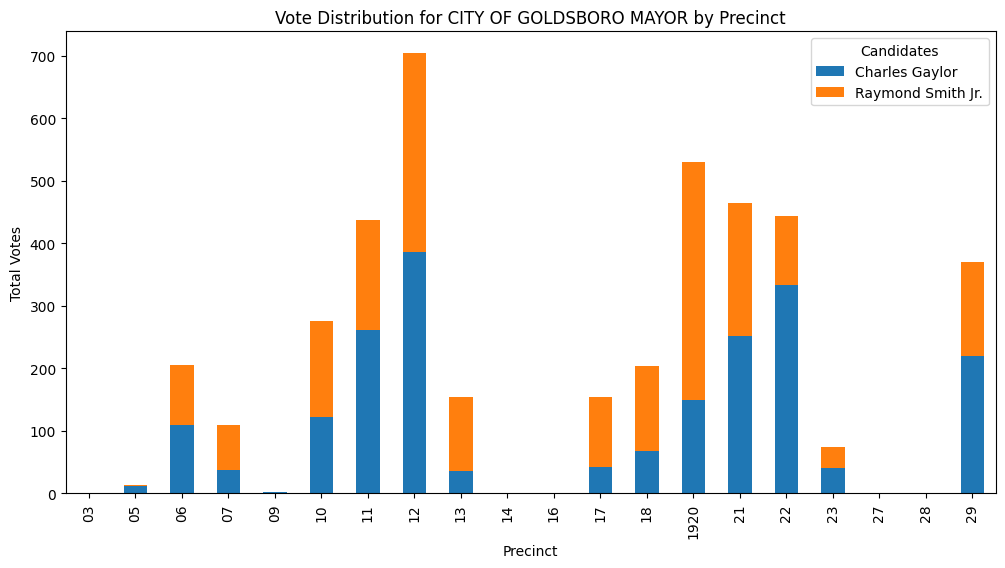

In [ ]:

# Filter the DataFrame for the contest name "CITY OF GOLDSBORO MAYOR"
mayor_contest_data = election23_results[election23_results['Contest Name'] == 'CITY OF GOLDSBORO MAYOR']

# Filter the data to include only the rows for Charles Gaylor and Raymond Smith Jr.
candidates_data = mayor_contest_data[mayor_contest_data['Choice'].isin(['Charles Gaylor', 'Raymond Smith, Jr.'])]

# Group data by precinct and calculate total votes for the two candidates
precinct_votes = candidates_data.groupby(['Precinct', 'Choice'])['Total Votes'].sum().unstack(fill_value=0)

# Create a stacked bar chart
precinct_votes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Vote Distribution for CITY OF GOLDSBORO MAYOR by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Total Votes')
plt.legend(title='Candidates', labels=['Charles Gaylor', 'Raymond Smith Jr.'])
plt.show()

In [ ]:
# Create a pivot table to show total votes by precinct for each candidate
pivot_table = pd.pivot_table(candidates_data, values='Total Votes', index='Precinct', columns='Choice', aggfunc='sum', fill_value=0)

# Reset the index and rename columns
pivot_table = pivot_table.reset_index()
pivot_table.columns.name = None

# Display the table
pivot_table


Precinct  Charles Gaylor  Raymond Smith, Jr.
0        03               0                   0
1        05              12                   1
2        06             110                  95
3        07              38                  72
4        09               3                   0
5        10             123                 153
6        11             261                 176
7        12             387                 317
8        13              36                 118
9        14               0                   1
10       16               0                   0
11       17              42                 113
12       18              68                 136
13     1920             149                 382
14       21             252                 212
15       22             334                 110
16       23              41                  33
17       27               0                   0
18       28               0                   0
19       29             220                 151

This gives us an idea of which precincts have the most participation and which precincts to prioritize when designing campaign strategy.

In [ ]:
# Sort the pivot table by the sum of total votes for both candidates
pivot_table['Total Votes'] = pivot_table['Charles Gaylor'] + pivot_table['Raymond Smith, Jr.']
top_precincts = pivot_table.sort_values(by='Total Votes', ascending=False).head(5)

# Display the top 5 precincts with voter participation
print("Top 5 Precincts by Voter Participation:")
top_precincts

Top 5 Precincts by Voter Participation:


Precinct  Charles Gaylor  Raymond Smith, Jr.  Total Votes
7        12             387                 317          704
13     1920             149                 382          531
14       21             252                 212          464
15       22             334                 110          444
6        11             261                 176          437

In [ ]:

# Calculate the total votes for each candidate
total_votes_charles_gaylor = candidates_data[candidates_data['Choice'] == 'Charles Gaylor']['Total Votes'].sum()
total_votes_raymond_smith_jr = candidates_data[candidates_data['Choice'] == 'Raymond Smith, Jr.']['Total Votes'].sum()

# Print the total votes for each candidate
print("Total Votes for Charles Gaylor:", total_votes_charles_gaylor)
print("Total Votes for Raymond Smith Jr.:", total_votes_raymond_smith_jr)


Total Votes for Charles Gaylor: 2076.0
Total Votes for Raymond Smith Jr.: 2070.0


A very close race!


# Data Cleaning & Preprocessing:

In [ ]:
# Data Cleaning and Preprocessing

# Filter out records where age_at_year_end is 99 or higher
# Assuming that the number of voters aged 99+ is suspiciously high
voter_data = voter_data[voter_data['age_at_year_end'] < 99]

# Information about the dataset reduction
original_row_count = 85268  # The original number of rows in the dataset
current_row_count = voter_data.shape[0]
dropped_rows_count = original_row_count - current_row_count
print(f"Original dataset rows: {original_row_count}")
print(f"Current dataset rows after filtering age: {current_row_count}")
print(f"Rows dropped: {dropped_rows_count}")

# Select only the necessary columns for analysis
required_columns = ['race_code', 'party_cd', 'gender_code',
                    'birth_year', 'birth_state', 'age_at_year_end',
                    'precinct_desc']
voter_data = voter_data[required_columns]

# Replace missing values in 'birth_state' with 'NC' (North Carolina)
voter_data['birth_state'].fillna('NC', inplace=True)

# Drop rows with missing values in 'precinct_desc'
voter_data = voter_data.dropna(subset=['precinct_desc'])

# Focus on the primary political parties for analysis
core_parties = ['DEM', 'REP', 'UNA']  # Democratic, Republican, Unaffiliated
voter_data = voter_data[voter_data['party_cd'].isin(core_parties)]

# Display the first few rows of the cleaned dataset
print("First few rows of the cleaned dataset:")

voter_data



Original dataset rows: 85268
Current dataset rows after filtering age: 84988
Rows dropped: 280
First few rows of the cleaned dataset:


race_code party_cd gender_code  birth_year birth_state  age_at_year_end  \
0             W      UNA           F        1984          VA               39   
1             W      REP           M        1956          CA               67   
2             W      UNA           M        1980          CA               43   
3             W      REP           F        1955          OC               68   
4             W      REP           F        1986          NY               37   
...         ...      ...         ...         ...         ...              ...   
85263         W      REP           F        1942          NC               81   
85264         W      REP           F        1976          NC               47   
85265         W      REP           M        1943          NC               80   
85266         A      UNA           F        1949          OC               74   
85267         B      DEM           M        1994          NY               29   

       precinct_desc  
0             2530.0  
1                7.0  
2               12.0  
3                7.0  
4               21.0  
...              ...  
85263            6.0  
85264            6.0  
85265            6.0  
85266            7.0  
85267         1920.0  

[73402 rows x 7 columns]

In [ ]:
# Feature Engineering: Calculating Voter Weights by Precinct and Party

# 1. Group by precinct and party, then count the number of voters
voter_counts = voter_data.groupby(['precinct_desc', 'party_cd']).size().reset_index(name='count')
print("Voter counts by precinct and party calculated.")

# 2. Calculate the total number of voters per precinct
total_voters = voter_data.groupby('precinct_desc').size().reset_index(name='total')
print("Total voters per precinct calculated.")

# 3. Merge the total voters count with the voter counts dataframe
# This adds the total voters count for each precinct to the voter_counts dataframe
voter_counts = voter_counts.merge(total_voters, on='precinct_desc')
print("Merged voter counts with total voters per precinct.")

# 4. Calculate the proportion of voters for each party in each precinct
# The 'weight' column represents the proportion of voters for a specific party in a precinct
voter_counts['weight'] = voter_counts['count'] / voter_counts['total']
print("Calculated the proportion of voters for each party in each precinct.")

# 5. Merge the 'weight' column back into the main dataframe
# This adds the proportion information to each corresponding row in the original dataframe
voter_data = voter_data.merge(voter_counts[['precinct_desc', 'party_cd', 'weight']], on=['precinct_desc', 'party_cd'], how='left')
print("Merged the weight data back into the main dataframe.")

# Display the first few rows of the updated dataframe
print("First few rows of the updated dataframe:")
display(voter_data.head())


Voter counts by precinct and party calculated.
Total voters per precinct calculated.
Merged voter counts with total voters per precinct.
Calculated the proportion of voters for each party in each precinct.
Merged the weight data back into the main dataframe.
First few rows of the updated dataframe:


race_code party_cd gender_code  birth_year birth_state  age_at_year_end  \
0         W      UNA           F        1984          VA               39   
1         W      REP           M        1956          CA               67   
2         W      UNA           M        1980          CA               43   
3         W      REP           F        1955          OC               68   
4         W      REP           F        1986          NY               37   

   precinct_desc    weight  
0         2530.0  0.250636  
1            7.0  0.395203  
2           12.0  0.297699  
3            7.0  0.395203  
4           21.0  0.168229

# Age Binning:
Categorizing individuals into age groups helps in analyzing the data by age segments instead of individual ages providing more predictive context.

In [ ]:
# Define the age bins and corresponding labels
age_bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Categorize the ages into bins
voter_data['age_group'] = pd.cut(voter_data['age_at_year_end'], bins=age_bins, labels=age_labels, right=False)

# Print confirmation and display the first few rows with the new age_group column
print("Age groups categorized successfully.")
display(voter_data[['age_at_year_end', 'age_group']].head())


Age groups categorized successfully.


age_at_year_end age_group
0               39     30-39
1               67     60-69
2               43     40-49
3               68     60-69
4               37     30-39

# **Different generations often exhibit distinct political preferences and priorities**.

By categorizing voters into generations, you can analyze how political affiliations and voting patterns vary across age groups, which is crucial for understanding broader voting trends.This categorization allows for more targeted campaign strategies. For instance, campaigns might tailor their messaging, policies, and communication channels to appeal specifically to Baby Boomers, Millennials, Gen Z, etc., based on their known preferences and behaviors.
Generational analysis can offer insights into the cultural and social factors that influence voting behavior. Each generation grows up in a different socio-political context, affecting their attitudes towards various issues. This understanding can be pivotal in shaping political discourse and policies.
In predictive analytics, including generation as a feature can enhance the predictive power of models. Generational data can help in predicting voting behavior, policy support, and other politically relevant outcomes more accurately.

# **Understanding the generational composition of the electorate helps in predicting future trends.**

For example, as Gen Z becomes a larger part of the electorate, their impact on elections and policies will likely increase, necessitating adjustments in political strategies. Different generations have varying preferences for communication and engagement. This information can be used to optimize outreach efforts, whether through social media, traditional media, or other forms of communication.

In [ ]:
# Function to Assign Generations Based on Birth Year
def assign_generation(year):
    """
    Categorizes a birth year into a generation.

    Parameters:
    year (int): The birth year to categorize.

    Returns:
    str: The name of the generation.
    """
    if 1928 <= year <= 1945:
        return "Silent"
    elif 1946 <= year <= 1964:
        return "Boomer"
    elif 1965 <= year <= 1980:
        return "Gen X"
    elif 1981 <= year <= 1996:
        return "Millennial"
    elif 1997 <= year <= 2012:
        return "Gen Z"
    else:
        return "Gen Alpha"

# Apply the function to categorize each individual into a generation
voter_data['generation'] = voter_data['birth_year'].apply(assign_generation)

# Print confirmation and display the first few rows with the new generation column
print("Generations assigned based on birth year.")
display(voter_data[['birth_year', 'generation']].head())


Generations assigned based on birth year.


birth_year  generation
0        1984  Millennial
1        1956      Boomer
2        1980       Gen X
3        1955      Boomer
4        1986  Millennial

# **Capturing Intersectionality**

This feature captures the concept of intersectionality, acknowledging that the combination of race and gender can have a unique impact on individuals' experiences and perspectives, including their political views and voting behavior. For instance, the political concerns and experiences of Black women might be different from those of Black men or white women, and this feature helps in identifying such nuanced differences.By combining two categorical variables (race and gender) into one, you create a more nuanced feature that can provide deeper insights when analyzing voter data. This can lead to more detailed and specific findings in your data analysis .Understanding how different demographic groups interact with political issues is crucial for designing targeted campaigns and policies. This feature allows political strategists to tailor their messages and policies to address the specific needs and preferences of these combined demographic groups.This feature also  could prove usefulin analyzing and addressing issues related to diversity and inclusion. It provides a tool to assess whether certain race-gender groups are underrepresented or marginalized in political processes.

In [ ]:
# Creating Interaction Features: Combining 'race_code' and 'gender_code' into a single feature
voter_data['race_gender'] = voter_data['race_code'] + voter_data['gender_code']

# Print confirmation and display the first few rows with the new race_gender column
print("Interaction feature 'race_gender' created.")
display(voter_data[['race_code', 'gender_code', 'race_gender']].head())


Interaction feature 'race_gender' created.


race_code gender_code race_gender
0         W           F          WF
1         W           M          WM
2         W           M          WM
3         W           F          WF
4         W           F          WF

In [ ]:
# Creating Interaction Feature: Combining 'generation' and 'race_gender'
voter_data['generation_race_gender'] = voter_data['generation'] + "_" + voter_data['race_gender']

# Print confirmation and display the first few rows with the new generation_race_gender column
print("Interaction feature 'generation_race_gender' created.")
display(voter_data[['generation', 'race_gender', 'generation_race_gender']].head())


Interaction feature 'generation_race_gender' created.


generation race_gender generation_race_gender
0  Millennial          WF          Millennial_WF
1      Boomer          WM              Boomer_WM
2       Gen X          WM               Gen X_WM
3      Boomer          WF              Boomer_WF
4  Millennial          WF          Millennial_WF

In [ ]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the 'age_at_year_end' column and create a new 'age_scaled' column
voter_data['age_scaled'] = scaler.fit_transform(voter_data[['age_at_year_end']])

# Print confirmation and display the first few rows with the new 'age_scaled' column
print("Age scaling completed.")
display(voter_data[['age_at_year_end', 'age_scaled']].head())


Age scaling completed.


age_at_year_end  age_scaled
0               39      0.2625
1               67      0.6125
2               43      0.3125
3               68      0.6250
4               37      0.2375

In [ ]:
voter_data.to_csv('Wayne_Voter_Data.csv', index=False)

In [ ]:
voter_data

race_code party_cd gender_code  birth_year birth_state  age_at_year_end  \
0             W      UNA           F        1984          VA               39   
1             W      REP           M        1956          CA               67   
2             W      UNA           M        1980          CA               43   
3             W      REP           F        1955          OC               68   
4             W      REP           F        1986          NY               37   
...         ...      ...         ...         ...         ...              ...   
73397         W      REP           F        1942          NC               81   
73398         W      REP           F        1976          NC               47   
73399         W      REP           M        1943          NC               80   
73400         A      UNA           F        1949          OC               74   
73401         B      DEM           M        1994          NY               29   

       precinct_desc    weight age_group  generation race_gender  \
0             2530.0  0.250636     30-39  Millennial          WF   
1                7.0  0.395203     60-69      Boomer          WM   
2               12.0  0.297699     40-49       Gen X          WM   
3                7.0  0.395203     60-69      Boomer          WF   
4               21.0  0.168229     30-39  Millennial          WF   
...              ...       ...       ...         ...         ...   
73397            6.0  0.355369     80-89      Silent          WF   
73398            6.0  0.355369     40-49       Gen X          WF   
73399            6.0  0.355369     80-89      Silent          WM   
73400            7.0  0.297691     70-79      Boomer          AF   
73401         1920.0  0.678468     18-29  Millennial          BM   

      generation_race_gender  age_scaled  
0              Millennial_WF      0.2625  
1                  Boomer_WM      0.6125  
2                   Gen X_WM      0.3125  
3                  Boomer_WF      0.6250  
4              Millennial_WF      0.2375  
...                      ...         ...  
73397              Silent_WF      0.7875  
73398               Gen X_WF      0.3625  
73399              Silent_WM      0.7750  
73400              Boomer_AF      0.7000  
73401          Millennial_BM      0.1375  

[73402 rows x 13 columns]

#Filtering by voter participation

In [ ]:
# Define a list of precinct values to filter
precinct_values_to_filter = [12.0, 1920.0, 21.0,22.0,11.0,29.0]

# Filter the demographic data to include only the rows with matching precinct values
filtered_demographics = voter_data[voter_data['precinct_desc'].isin(precinct_values_to_filter)]

filtered_demographics

race_code party_cd gender_code  birth_year birth_state  age_at_year_end  \
2             W      UNA           M        1980          CA               43   
4             W      REP           F        1986          NY               37   
5             W      UNA           M        1984          CT               39   
10            O      REP           M        1986          OC               37   
13            W      DEM           F        2000          NC               23   
...         ...      ...         ...         ...         ...              ...   
73380         O      REP           F        1985          NC               38   
73393         W      UNA           M        1949          NY               74   
73394         W      DEM           F        1951          PA               72   
73395         W      REP           F        1968          NC               55   
73401         B      DEM           M        1994          NY               29   

       precinct_desc    weight age_group  generation race_gender  \
2               12.0  0.297699     40-49       Gen X          WM   
4               21.0  0.168229     30-39  Millennial          WF   
5               21.0  0.269167     30-39  Millennial          WM   
10              21.0  0.168229     30-39  Millennial          OM   
13              12.0  0.447131     18-29       Gen Z          WF   
...              ...       ...       ...         ...         ...   
73380           29.0  0.172796     30-39  Millennial          OF   
73393           12.0  0.297699     70-79      Boomer          WM   
73394           11.0  0.499590     70-79      Boomer          WF   
73395           12.0  0.255170     50-59       Gen X          WF   
73401         1920.0  0.678468     18-29  Millennial          BM   

      generation_race_gender  age_scaled                     polling_place  
2                   Gen X_WM      0.3125         Adamsville Baptist Church  
4              Millennial_WF      0.2375  St. Luke United Methodist Church  
5              Millennial_WM      0.2625  St. Luke United Methodist Church  
10             Millennial_OM      0.2375  St. Luke United Methodist Church  
13                  Gen Z_WF      0.0625         Adamsville Baptist Church  
...                      ...         ...                               ...  
73380          Millennial_OF      0.2500       Wayne County Public Library  
73393              Boomer_WM      0.7000         Adamsville Baptist Church  
73394              Boomer_WF      0.6750        Greenleaf Christian Church  
73395               Gen X_WF      0.4625         Adamsville Baptist Church  
73401          Millennial_BM      0.1375      First African Baptist Church  

[13943 rows x 14 columns]

In [ ]:
# Identify the top precincts based on voter count
top_precincts = filtered_demographics['precinct_desc'].value_counts().head(5).index

# Extract polling places for top precincts
top_precinct_polling_places = filtered_demographics[voter_data['precinct_desc'].isin(top_precincts)][['precinct_desc', 'polling_place']].drop_duplicates()

print(top_precinct_polling_places)

    precinct_desc                     polling_place
2            12.0         Adamsville Baptist Church
4            21.0  St. Luke United Methodist Church
21           11.0        Greenleaf Christian Church
29           22.0             Faith Alliance Church
42         1920.0      First African Baptist Church


<ipython-input-39-425aa23729c6>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_precinct_polling_places = filtered_demographics[voter_data['precinct_desc'].isin(top_precincts)][['precinct_desc', 'polling_place']].drop_duplicates()


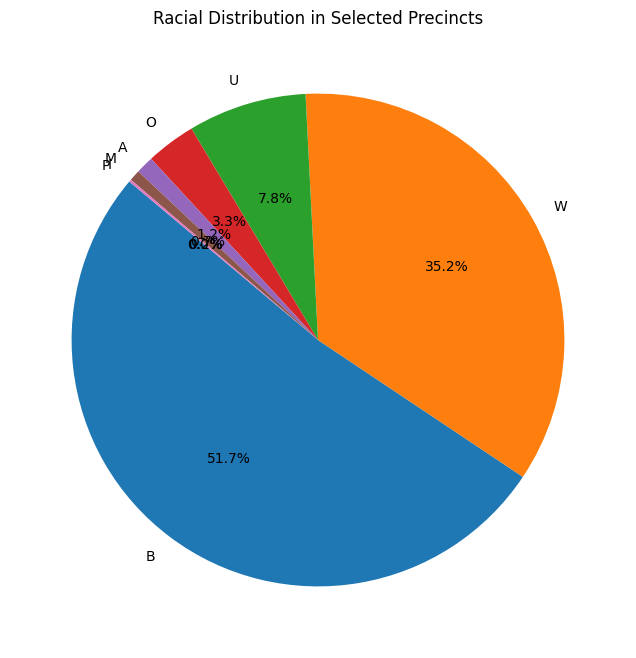

In [ ]:

# Calculate racial distribution percentage
racial_percentage = (filtered_demographics['race_code'].value_counts(normalize=True) * 100).round(2)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(racial_percentage, labels=racial_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Racial Distribution in Selected Precincts')
plt.show()

In [ ]:
filtered_demographics.describe()

birth_year  age_at_year_end  precinct_desc        weight  \
count  13943.000000     13943.000000   13943.000000  13943.000000   
mean    1971.479380        51.520620     395.138636      0.406533   
std       19.762744        19.762744     758.959332      0.161091   
min     1925.000000        18.000000      11.000000      0.070087   
25%     1956.000000        34.000000      12.000000      0.262295   
50%     1971.000000        52.000000      21.000000      0.444257   
75%     1989.000000        67.000000      29.000000      0.541740   
max     2005.000000        98.000000    1920.000000      0.678468   

         age_scaled  
count  13943.000000  
mean       0.419008  
std        0.247034  
min        0.000000  
25%        0.200000  
50%        0.425000  
75%        0.612500  
max        1.000000

# Data Exploration & Visualization

Doing some preliminary analysis of the data to understand its structure, columns, and types.

Visualizations to understand data distribution, patterns, and potential outliers.

## Exploring Age:

<ipython-input-28-224f6ca93b88>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=voter_data, x='age_group', bins=6, palette='pastel', ax=ax)


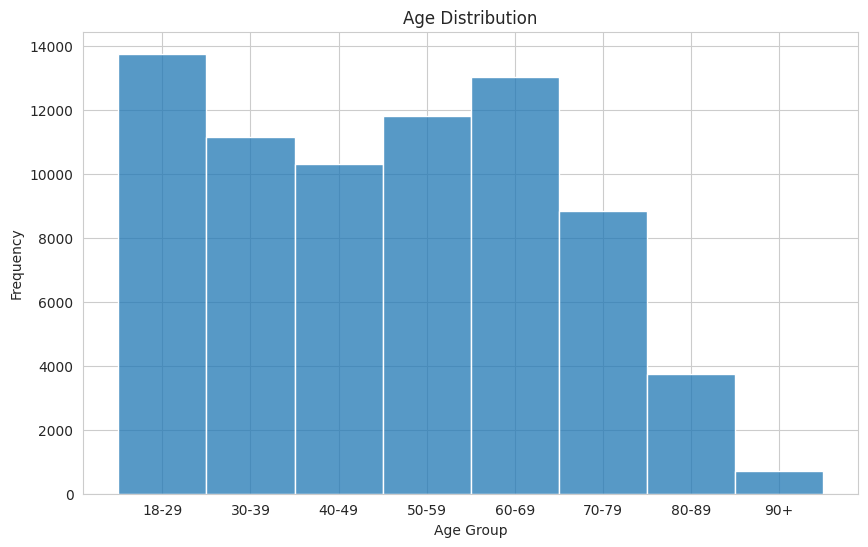

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axis object using subplots for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram for age using seaborn
sns.histplot(data=voter_data, x='age_group', bins=6, palette='pastel', ax=ax)

# Set plot title and labels
ax.set_title('Age Distribution')
ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()

#Age distribution of Top Participatory Precincts


<ipython-input-29-778aae8de047>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filtered_demographics, x='age_group', bins=6, palette='pastel', ax=ax)


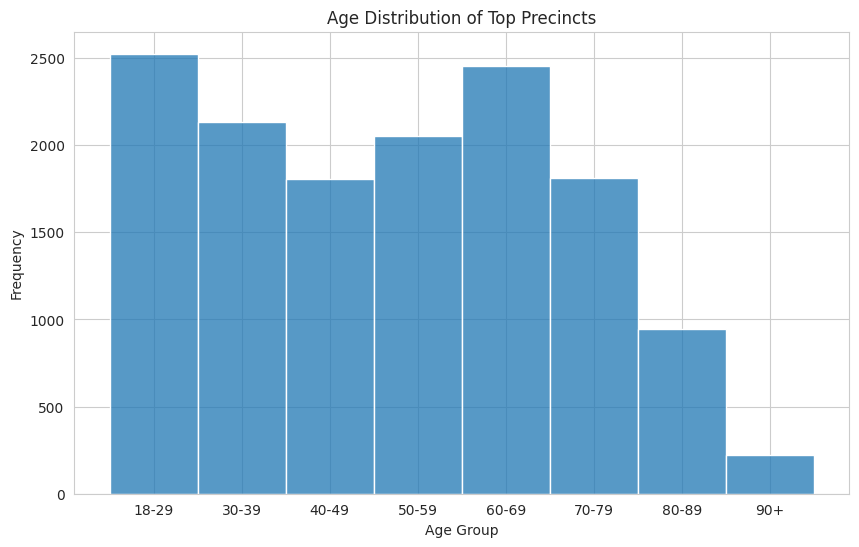

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axis object using subplots for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Create a histogram for age using seaborn
sns.histplot(data=filtered_demographics, x='age_group', bins=6, palette='pastel', ax=ax)

# Set plot title and labels
ax.set_title('Age Distribution of Top Precincts')
ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()

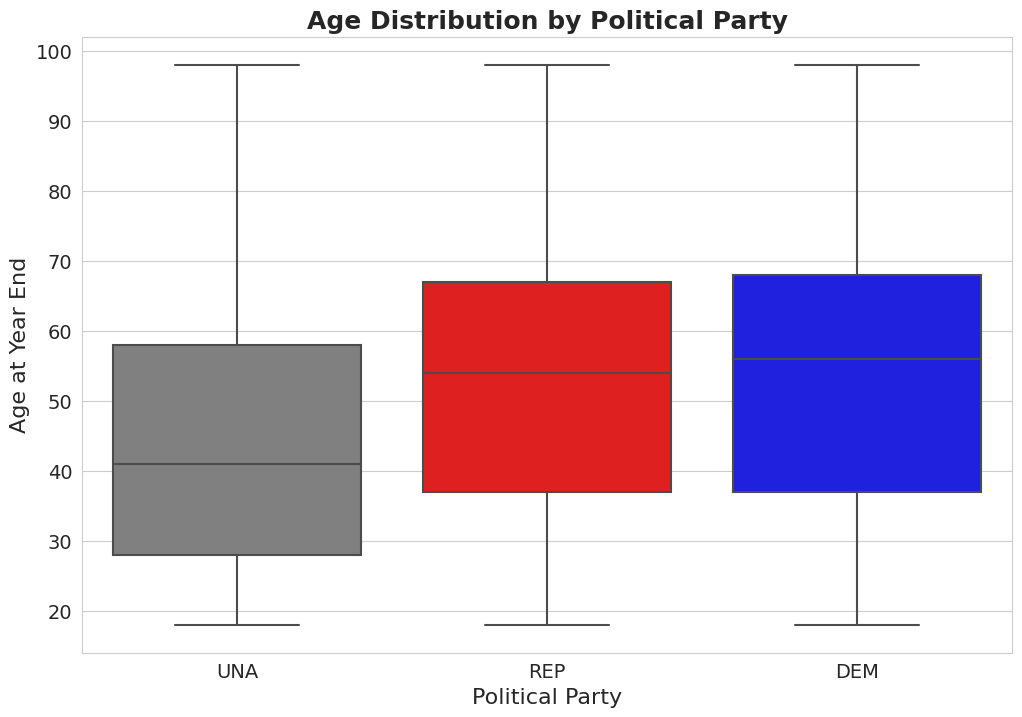

In [ ]:
# Define party colors
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'UNA': 'gray'  # Adjust as needed
}

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a box plot for age with party colors using seaborn
sns.boxplot(data=voter_data, x='party_cd', y='age_at_year_end', palette=party_colors, ax=ax)

# Set plot title and labels
ax.set_title('Age Distribution by Political Party', fontsize=18, fontweight='bold')
ax.set_ylabel('Age at Year End', fontsize=16)
ax.set_xlabel('Political Party', fontsize=16)
ax.tick_params(axis='both', which='both', labelsize=14)

# Display the plot
plt.show()


#Party Distiribution within Top Participating Precincts

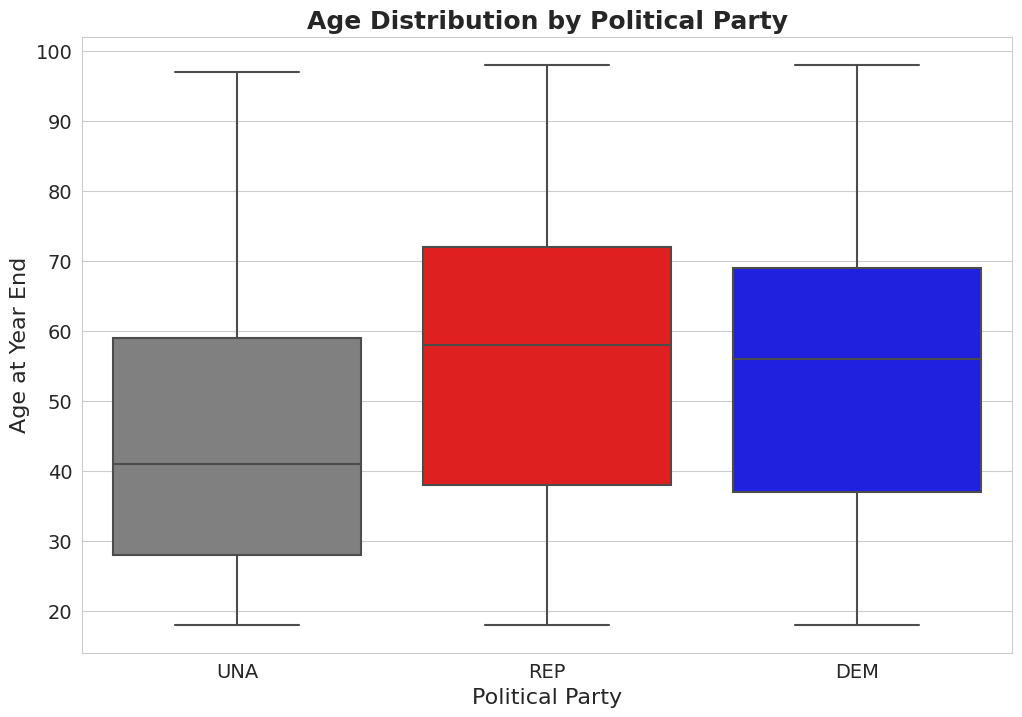

In [ ]:
# Define party colors
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'UNA': 'gray'  # Adjust as needed
}

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a box plot for age with party colors using seaborn
sns.boxplot(data=filtered_demographics, x='party_cd', y='age_at_year_end', palette=party_colors, ax=ax)

# Set plot title and labels
ax.set_title('Age Distribution by Political Party', fontsize=18, fontweight='bold')
ax.set_ylabel('Age at Year End', fontsize=16)
ax.set_xlabel('Political Party', fontsize=16)
ax.tick_params(axis='both', which='both', labelsize=14)

# Display the plot
plt.show()


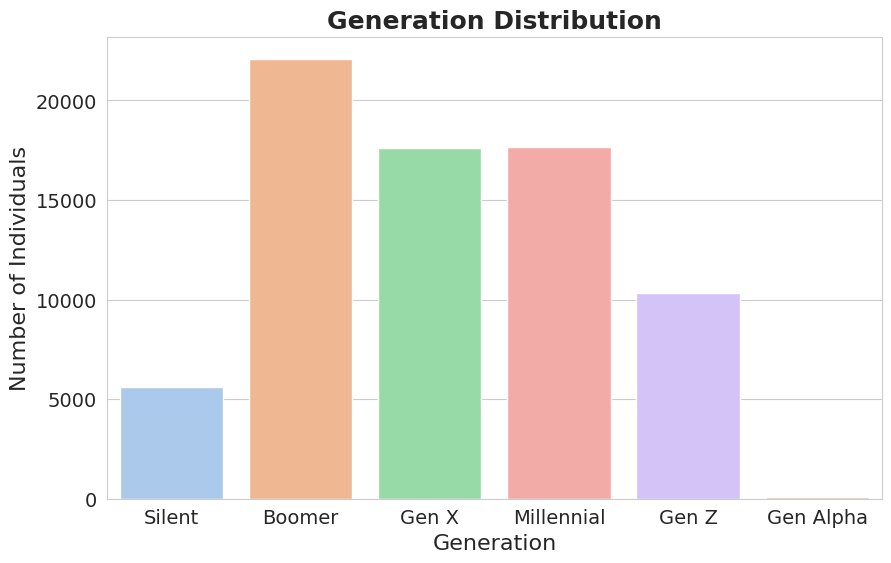

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for generation
sns.countplot(data=voter_data, x='generation', order=['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha'], ax=ax, palette='pastel')

# Set plot title and labels
ax.set_title('Generation Distribution', fontsize=18, fontweight='bold')
ax.set_ylabel('Number of Individuals', fontsize=16)
ax.set_xlabel('Generation', fontsize=16)
ax.tick_params(axis='both', which='both', labelsize=14)

# Display the plot
plt.show()


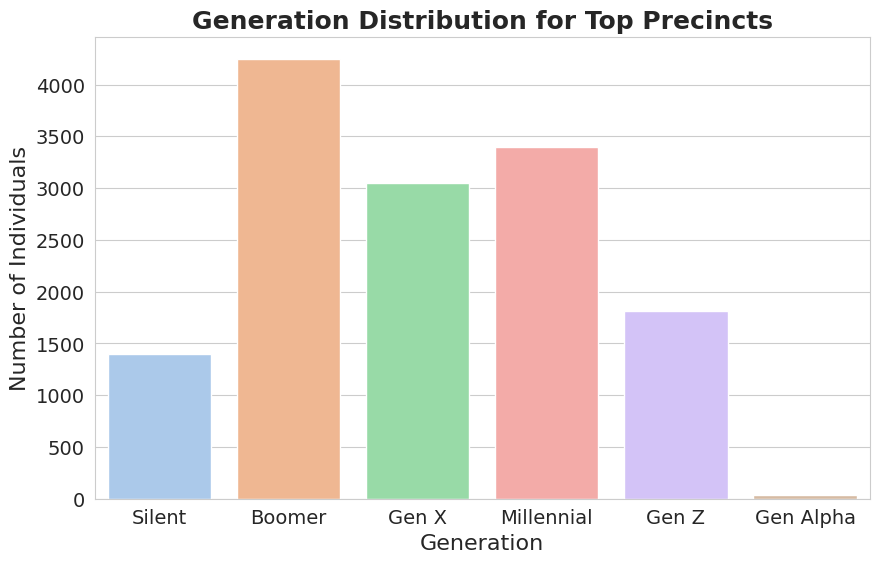

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for generation
sns.countplot(data=filtered_demographics, x='generation', order=['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha'], ax=ax, palette='pastel')

# Set plot title and labels
ax.set_title('Generation Distribution for Top Precincts', fontsize=18, fontweight='bold')
ax.set_ylabel('Number of Individuals', fontsize=16)
ax.set_xlabel('Generation', fontsize=16)
ax.tick_params(axis='both', which='both', labelsize=14)

# Display the plot
plt.show()


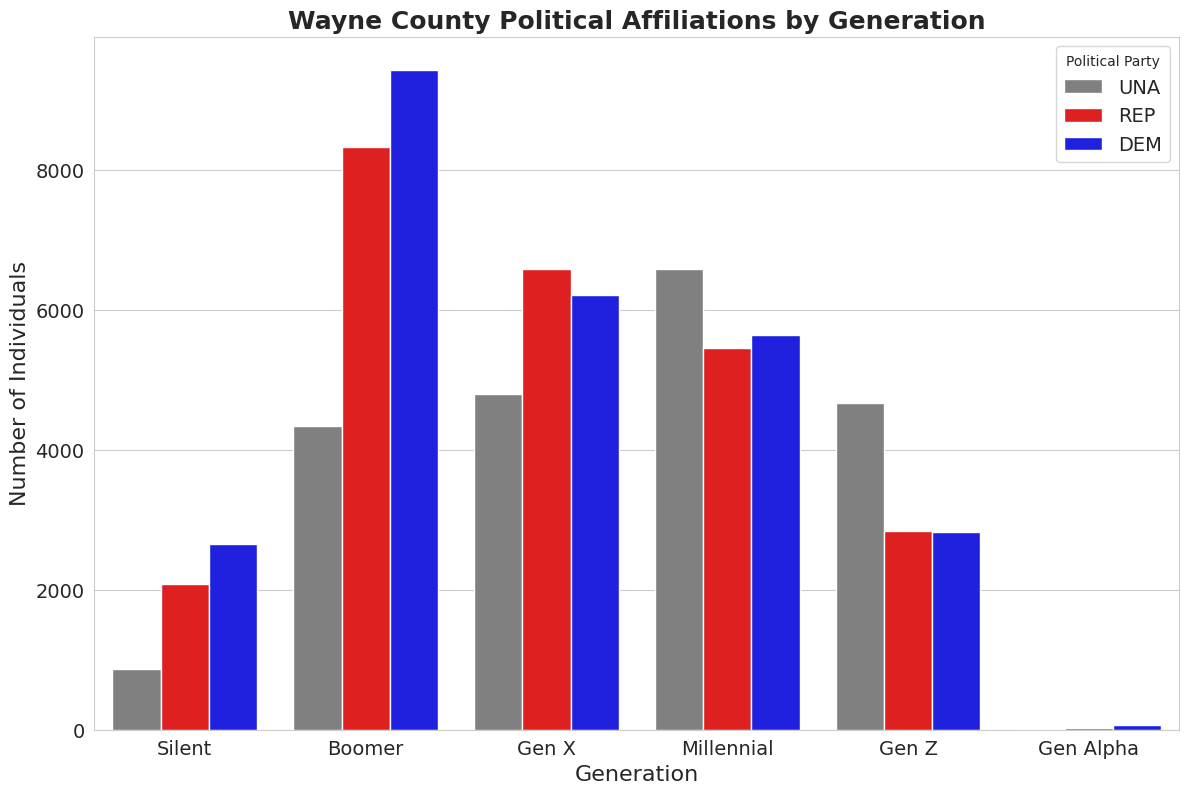

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(14, 9))

# Create a grouped bar plot for political affiliations by generation with party colors
sns.countplot(data=voter_data, x='generation', hue='party_cd', palette=party_colors, order=['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha'], ax=ax)

# Enhanced titles and labels for better readability
ax.set_title('Wayne County Political Affiliations by Generation', fontsize=18, fontweight='bold')
ax.set_ylabel('Number of Individuals', fontsize=16)
ax.set_xlabel('Generation', fontsize=16)
ax.legend(title='Political Party', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=14)

# Display the plot
plt.show()


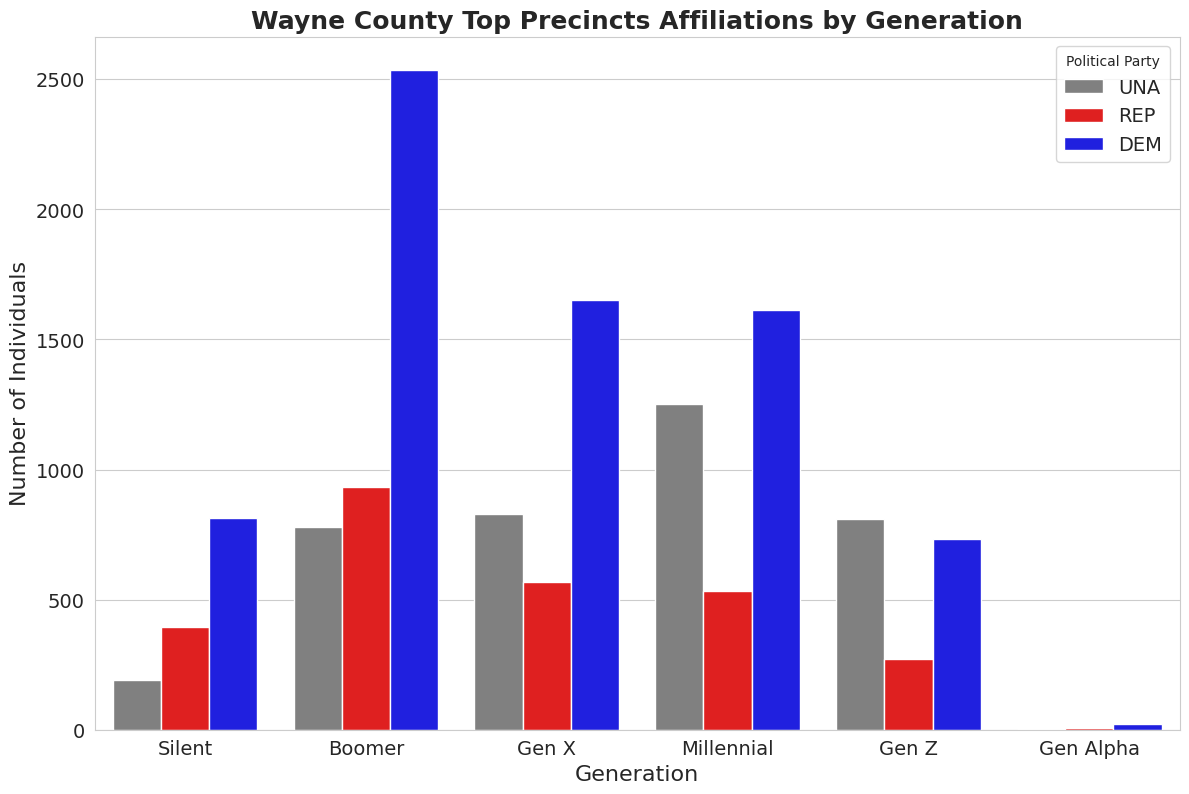

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(14, 9))

# Create a grouped bar plot for political affiliations by generation with party colors
sns.countplot(data=filtered_demographics, x='generation', hue='party_cd', palette=party_colors, order=['Silent', 'Boomer', 'Gen X', 'Millennial', 'Gen Z', 'Gen Alpha'], ax=ax)

# Enhanced titles and labels for better readability
ax.set_title('Wayne County Top Precincts Affiliations by Generation', fontsize=18, fontweight='bold')
ax.set_ylabel('Number of Individuals', fontsize=16)
ax.set_xlabel('Generation', fontsize=16)
ax.legend(title='Political Party', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=14)

# Display the plot
plt.show()


#Exploring Race:

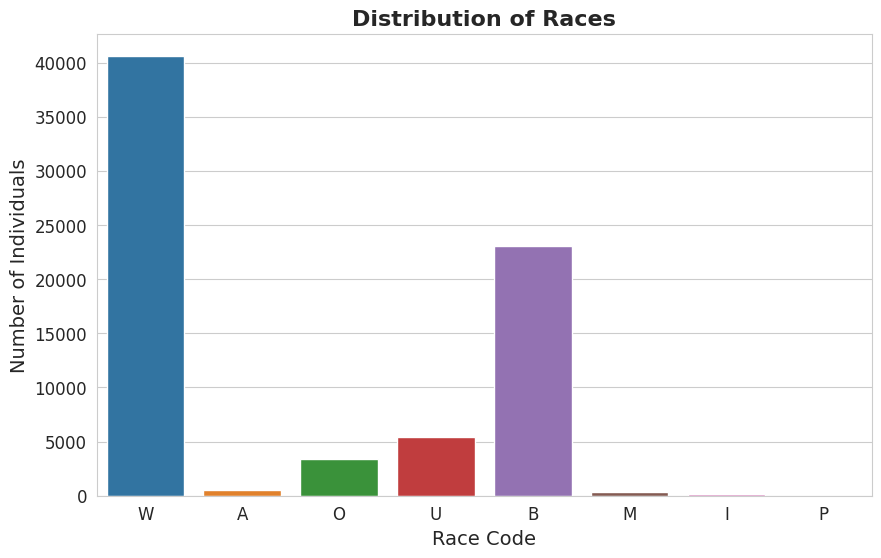

In [ ]:
# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for the distribution of races
sns.countplot(data=voter_data, x='race_code', ax=ax)

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Races', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.set_xlabel('Race Code', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()


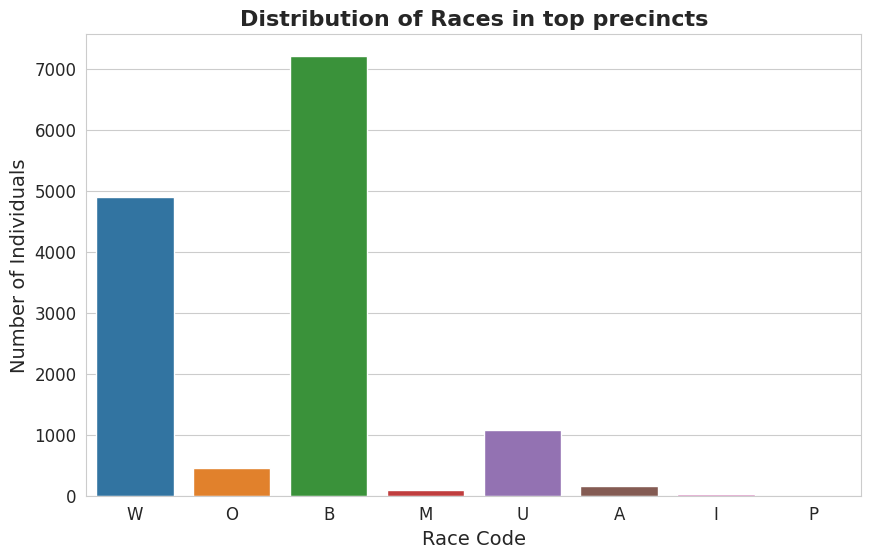

In [ ]:
# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar plot for the distribution of races
sns.countplot(data=filtered_demographics, x='race_code', ax=ax)

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Races in top precincts', fontsize=16, fontweight='bold')
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.set_xlabel('Race Code', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()


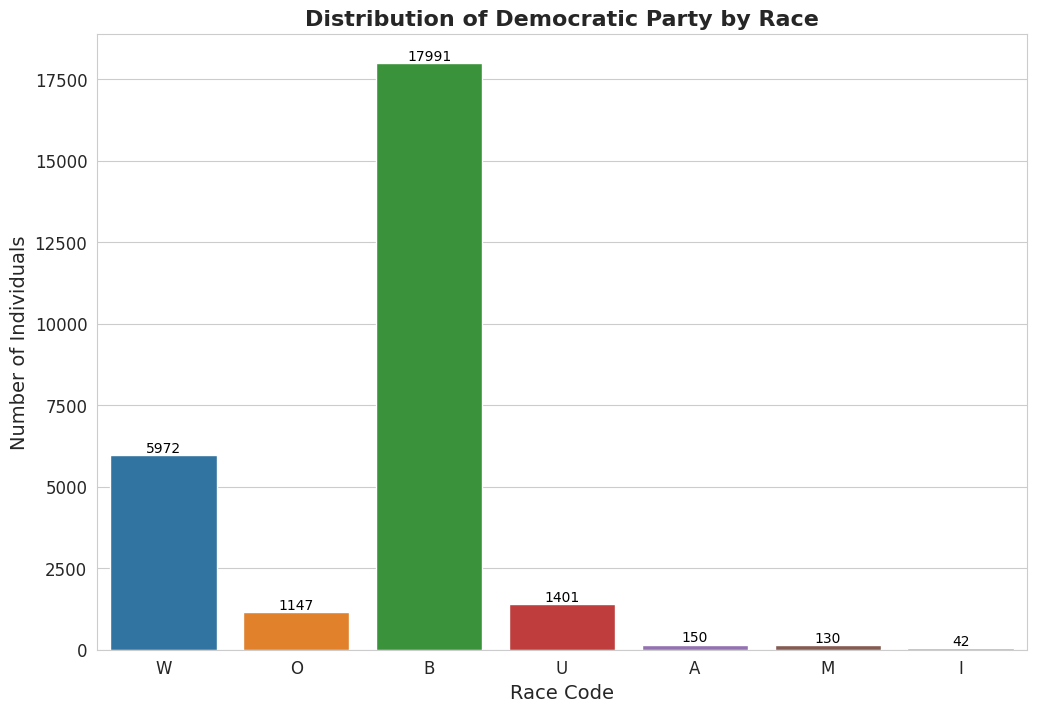

In [ ]:
# Filter the DataFrame for Democratic Party (DEM)
dem_df = voter_data[voter_data['party_cd'] == 'DEM']

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot for the distribution of Democratic Party by race
ax = sns.countplot(data=dem_df, x='race_code', ax=ax)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Democratic Party by Race', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Code', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()

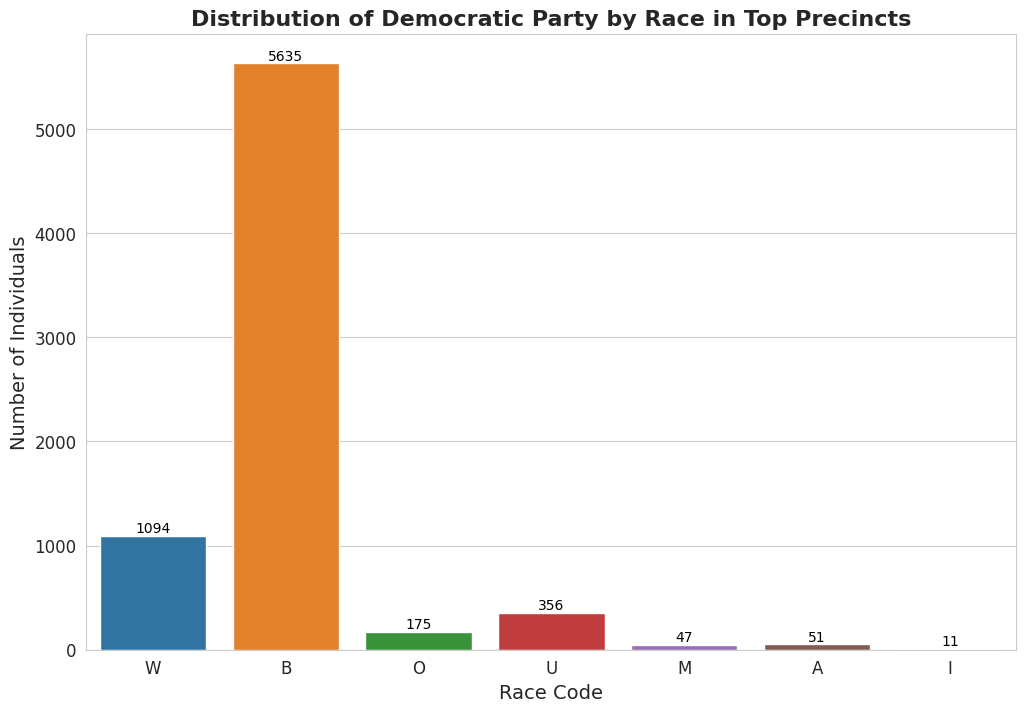

In [ ]:
# Filter the DataFrame for Democratic Party (DEM)
filtered_dem_df = filtered_demographics[filtered_demographics['party_cd'] == 'DEM']

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot for the distribution of Democratic Party by race
ax = sns.countplot(data=filtered_dem_df, x='race_code', ax=ax)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Democratic Party by Race in Top Precincts', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Code', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()

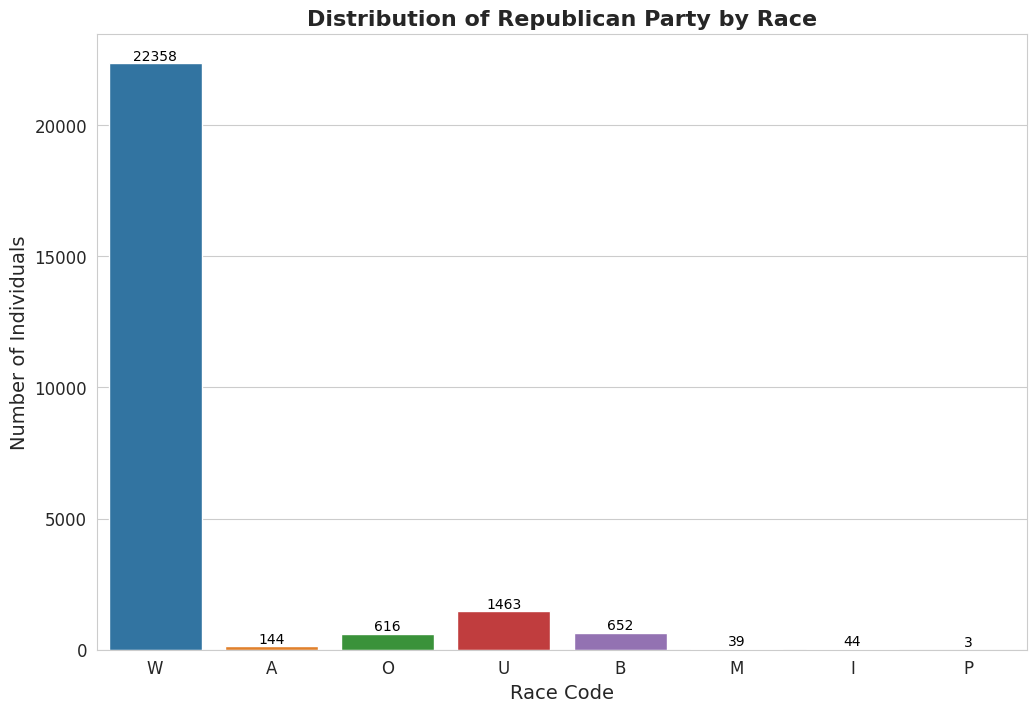

In [ ]:
# Filter the DataFrame for Republican Party (REP)
rep_df = voter_data[voter_data['party_cd'] == 'REP']

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot for the distribution of Republican Party by race
ax = sns.countplot(data=rep_df, x='race_code', ax=ax)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Republican Party by Race', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Code', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()

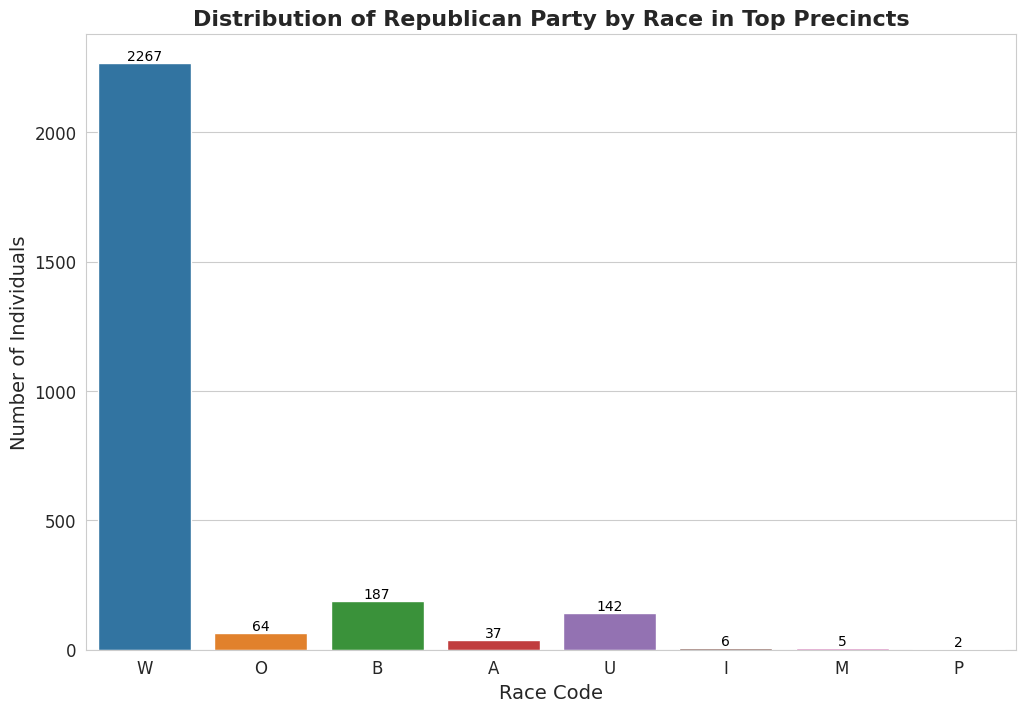

In [ ]:
# Filter the DataFrame for Republican Party (REP)
filtered_rep_df = filtered_demographics[filtered_demographics['party_cd'] == 'REP']

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot for the distribution of Republican Party by race
ax = sns.countplot(data=filtered_rep_df, x='race_code', ax=ax)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Republican Party by Race in Top Precincts', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Code', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()

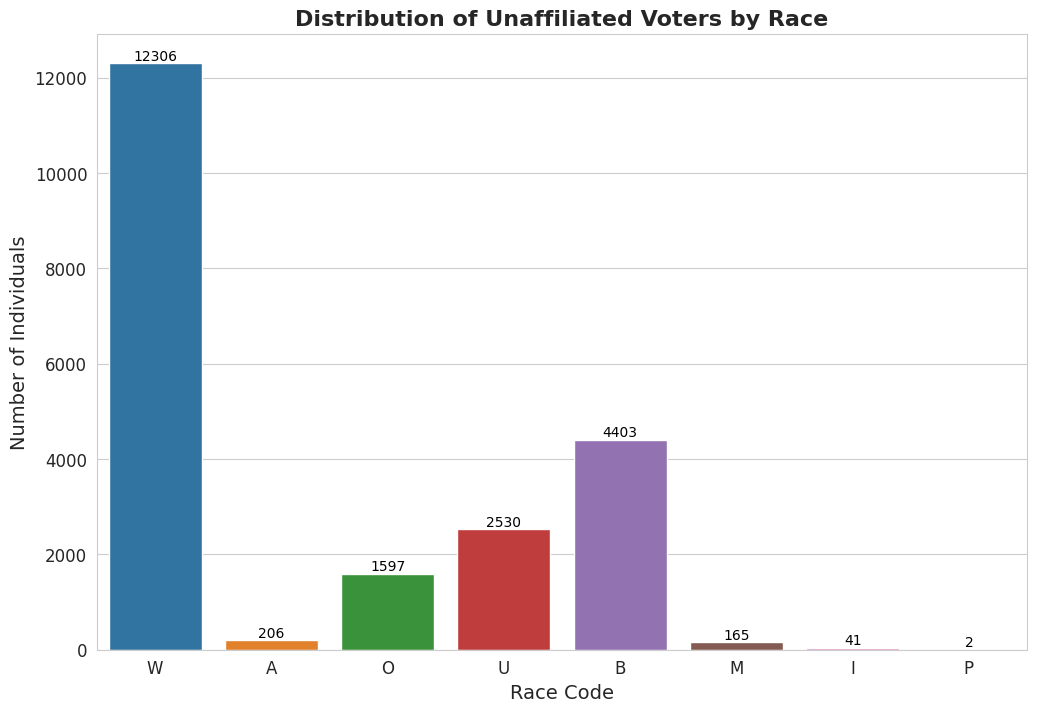

In [ ]:
# Filter the DataFrame for Unaffiliated voters (UNA)
una_df = voter_data[voter_data['party_cd'] == 'UNA']

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot for the distribution of Unaffiliated voters by race
ax = sns.countplot(data=una_df, x='race_code', ax=ax)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Unaffiliated Voters by Race', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Code', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()

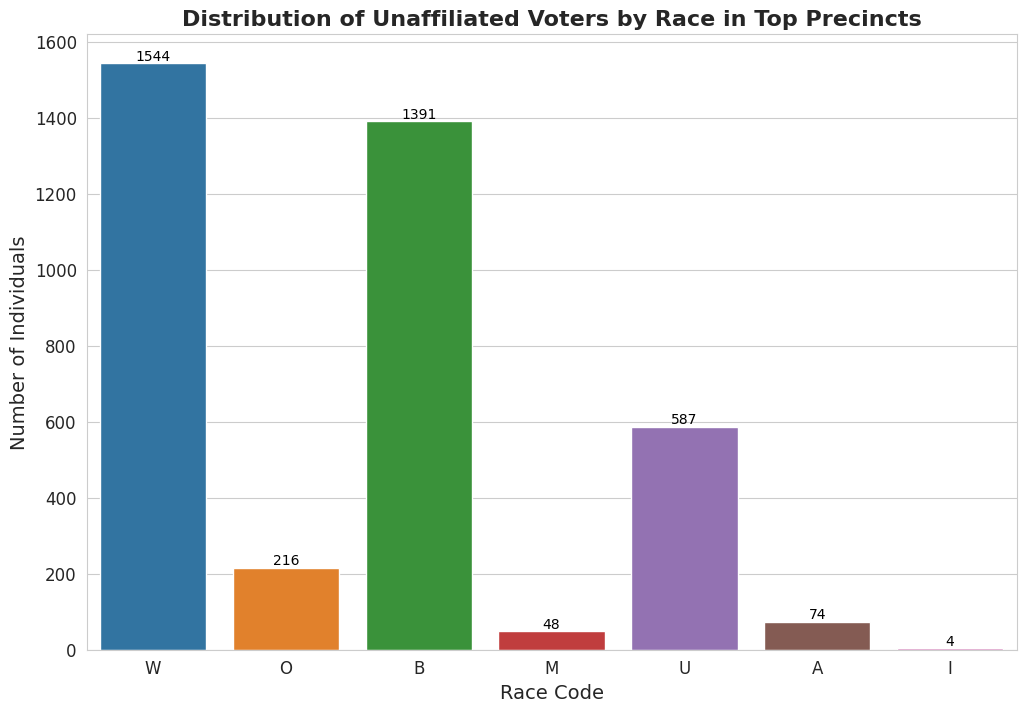

In [ ]:
# Filter the DataFrame for Unaffiliated voters (UNA)
filtered_una_df = filtered_demographics[filtered_demographics['party_cd'] == 'UNA']

# Create a figure and axis object for better control
fig, ax = plt.subplots(figsize=(12, 8))

# Create a countplot for the distribution of Unaffiliated voters by race
ax = sns.countplot(data=filtered_una_df, x='race_code', ax=ax)

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Enhanced titles and labels for better readability
ax.set_title('Distribution of Unaffiliated Voters by Race in Top Precincts', fontsize=16, fontweight='bold')
ax.set_xlabel('Race Code', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)

# Display the plot
plt.show()

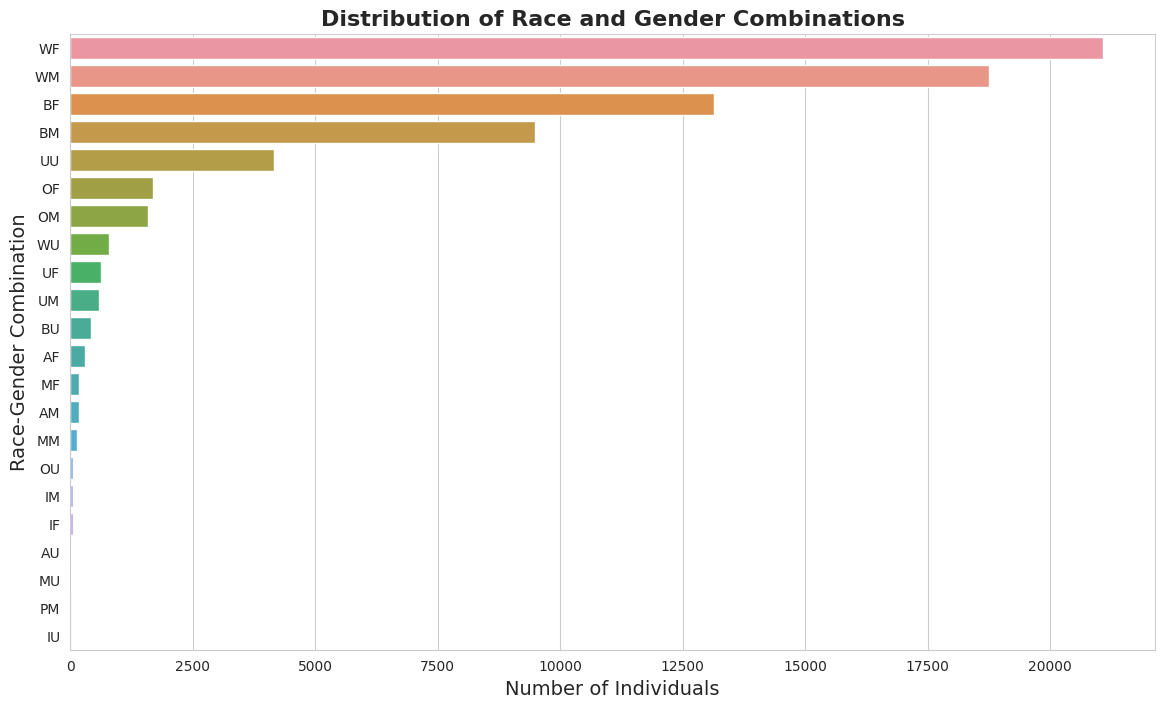

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(14, 8))

# Create a countplot with the Y-axis to better fit long horizontal bars and order by value counts
sns.countplot(data=voter_data, y='race_gender', order=voter_data['race_gender'].value_counts().index)

# Enhanced titles and labels for better readability
plt.title('Distribution of Race and Gender Combinations', fontsize=16, fontweight='bold')
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Race-Gender Combination', fontsize=14)

# Display the plot
plt.show()


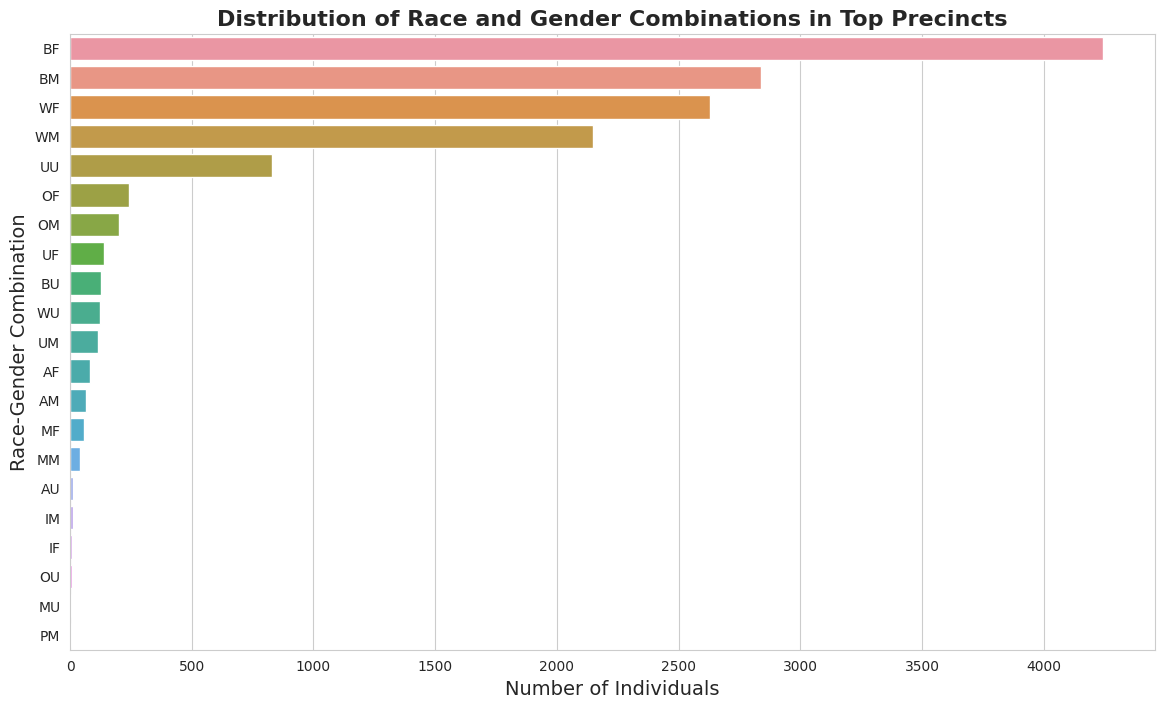

In [ ]:
# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(14, 8))

# Create a countplot with the Y-axis to better fit long horizontal bars and order by value counts
sns.countplot(data=filtered_demographics, y='race_gender', order=filtered_demographics['race_gender'].value_counts().index)

# Enhanced titles and labels for better readability
plt.title('Distribution of Race and Gender Combinations in Top Precincts', fontsize=16, fontweight='bold')
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Race-Gender Combination', fontsize=14)

# Display the plot
plt.show()


HMMMMMMMM

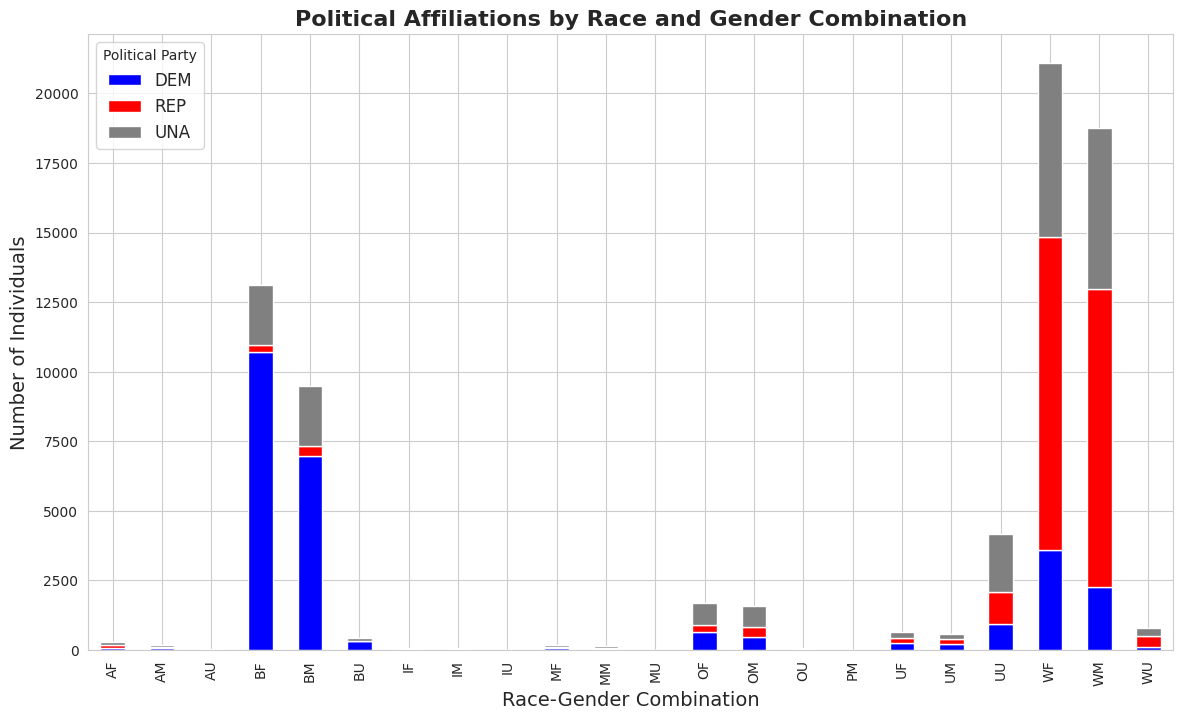

In [ ]:
# Create a crosstab of race_gender and party_cd
ct = pd.crosstab(voter_data['race_gender'], voter_data['party_cd'])


# Plot with party colors
ax = ct.plot(kind='bar', stacked=True, figsize=(14, 8), color=[party_colors[col] for col in ct.columns])

# Enhanced titles, labels, and legend for better readability
ax.set_title('Political Affiliations by Race and Gender Combination', fontsize=16, fontweight='bold')
ax.set_xlabel('Race-Gender Combination', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.legend(title='Political Party', fontsize=12)

# Display the plot
plt.show()


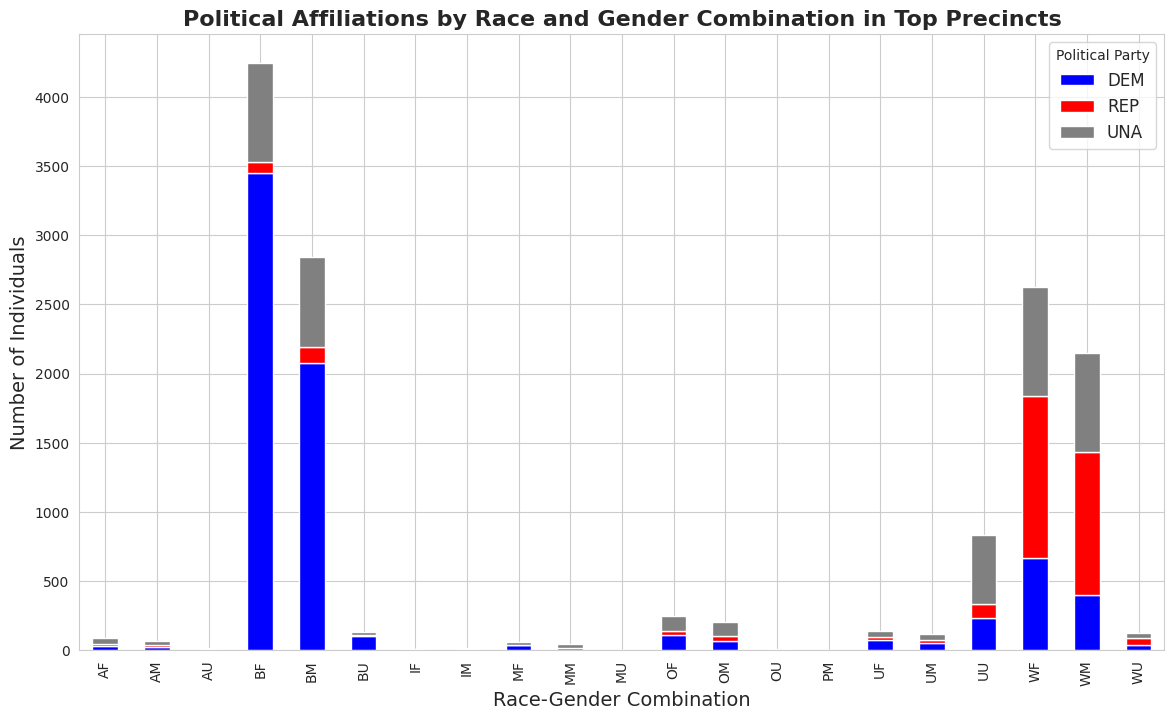

In [ ]:
# Create a crosstab of race_gender and party_cd
filtered_ct = pd.crosstab(filtered_demographics['race_gender'], filtered_demographics['party_cd'])


# Plot with party colors
ax = filtered_ct.plot(kind='bar', stacked=True, figsize=(14, 8), color=[party_colors[col] for col in filtered_ct.columns])

# Enhanced titles, labels, and legend for better readability
ax.set_title('Political Affiliations by Race and Gender Combination in Top Precincts', fontsize=16, fontweight='bold')
ax.set_xlabel('Race-Gender Combination', fontsize=14)
ax.set_ylabel('Number of Individuals', fontsize=14)
ax.legend(title='Political Party', fontsize=12)

# Display the plot
plt.show()


HMMMMMMMMMMMMMMM

# Evaluating the Relationship between Precinct and Party Affiliation



<Figure size 1500x700 with 0 Axes>

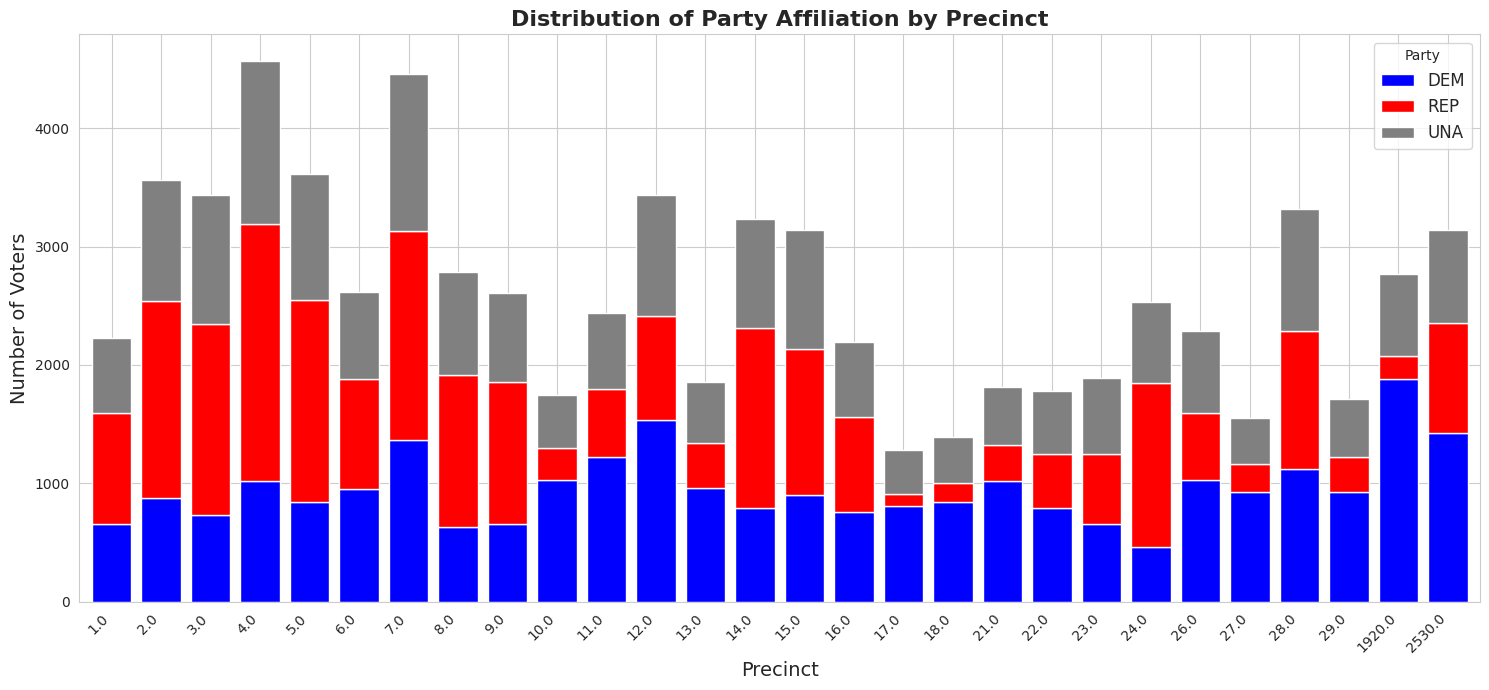

In [ ]:
# Group data by 'precinct_desc' and 'party_cd' and get counts, then pivot the data
party_counts = voter_data.groupby(['precinct_desc', 'party_cd']).size().unstack().fillna(0)

# Create a figure with an appropriate size
plt.figure(figsize=(15, 7))

# Define party colors
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'UNA': 'gray'  # Adjust as needed
}

# Create the stacked bar chart with color mapping
party_counts.plot(kind='bar', stacked=True, figsize=(15, 7), width=0.8, color=[party_colors[col] for col in party_counts.columns])

# Set the title and labels
plt.title('Distribution of Party Affiliation by Precinct', fontsize=16, fontweight='bold')
plt.xlabel('Precinct', fontsize=14)
plt.ylabel('Number of Voters', fontsize=14)
plt.legend(title='Party', fontsize=12)

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


<Figure size 1500x700 with 0 Axes>

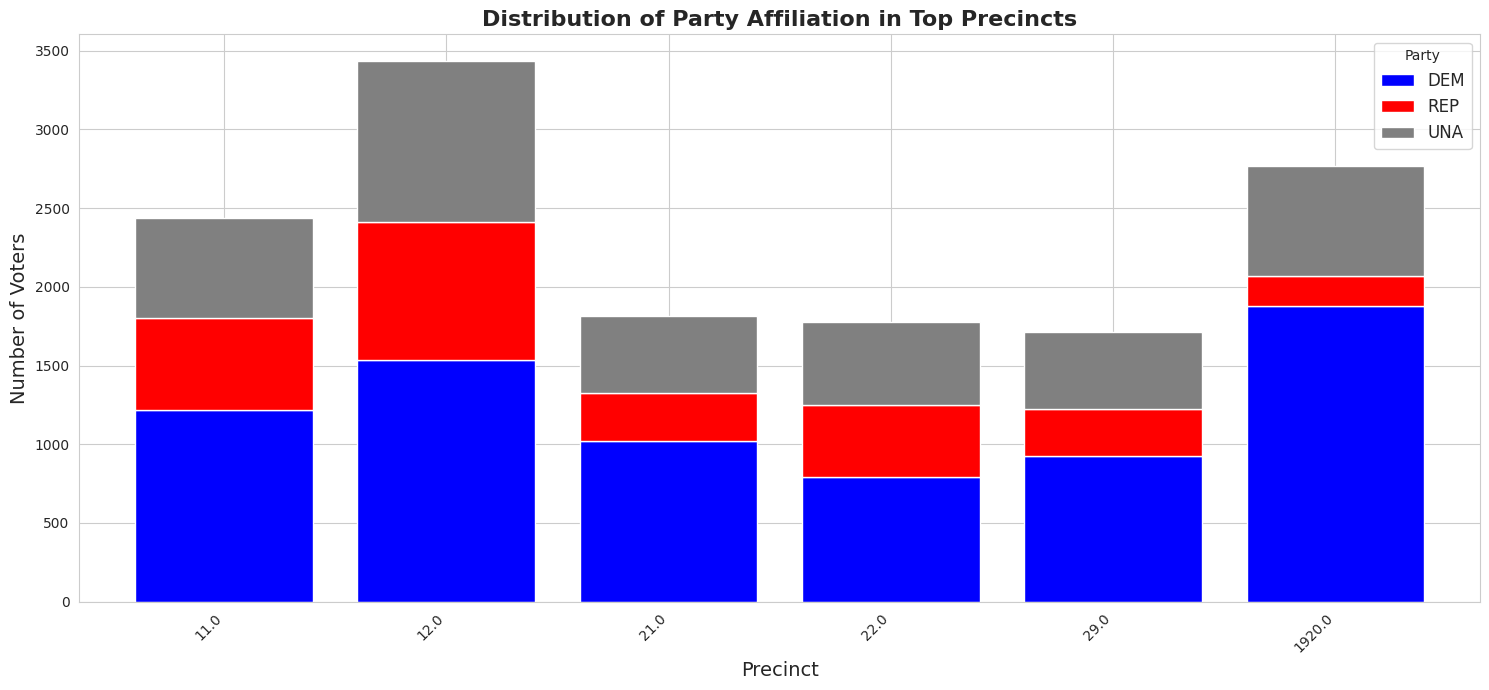

In [ ]:
# Group data by 'precinct_desc' and 'party_cd' and get counts, then pivot the data
filtered_party_counts = filtered_demographics.groupby(['precinct_desc', 'party_cd']).size().unstack().fillna(0)

# Create a figure with an appropriate size
plt.figure(figsize=(15, 7))

# Define party colors
party_colors = {
    'DEM': 'blue',
    'REP': 'red',
    'UNA': 'gray'  # Adjust as needed
}

# Create the stacked bar chart with color mapping
filtered_party_counts.plot(kind='bar', stacked=True, figsize=(15, 7), width=0.8, color=[party_colors[col] for col in filtered_party_counts.columns])

# Set the title and labels
plt.title('Distribution of Party Affiliation in Top Precincts', fontsize=16, fontweight='bold')
plt.xlabel('Precinct', fontsize=14)
plt.ylabel('Number of Voters', fontsize=14)
plt.legend(title='Party', fontsize=12)

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


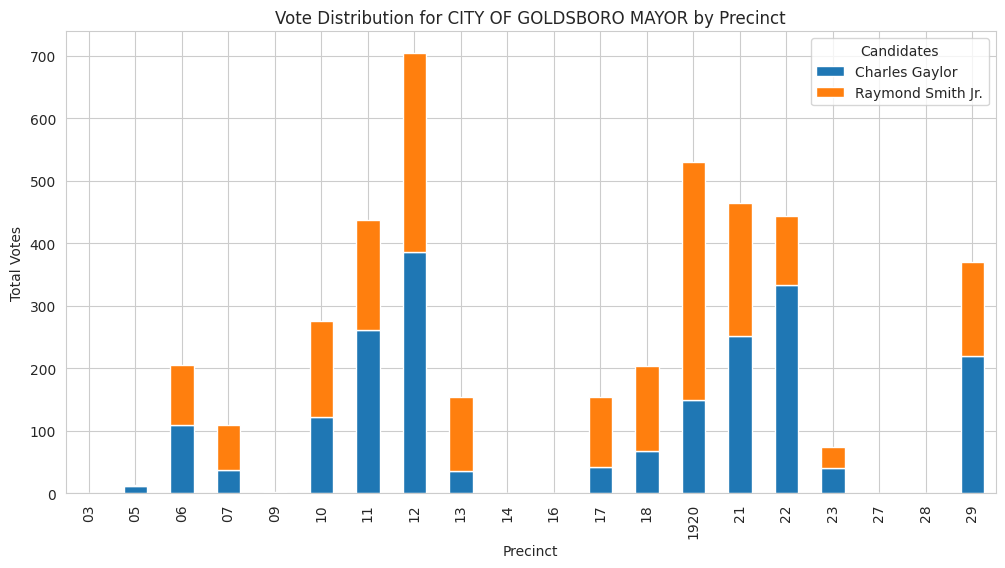

In [ ]:

# Filter the DataFrame for the contest name "CITY OF GOLDSBORO MAYOR"
mayor_contest_data = election23_results[election23_results['Contest Name'] == 'CITY OF GOLDSBORO MAYOR']

# Filter the data to include only the rows for Charles Gaylor and Raymond Smith Jr.
candidates_data = mayor_contest_data[mayor_contest_data['Choice'].isin(['Charles Gaylor', 'Raymond Smith, Jr.'])]

# Group data by precinct and calculate total votes for the two candidates
precinct_votes = candidates_data.groupby(['Precinct', 'Choice'])['Total Votes'].sum().unstack(fill_value=0)

# Create a stacked bar chart
precinct_votes.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Vote Distribution for CITY OF GOLDSBORO MAYOR by Precinct')
plt.xlabel('Precinct')
plt.ylabel('Total Votes')
plt.legend(title='Candidates', labels=['Charles Gaylor', 'Raymond Smith Jr.'])
plt.show()

In [ ]:
filtered_party_counts

party_cd        DEM  REP   UNA
precinct_desc                 
11.0           1219  581   640
12.0           1535  876  1022
21.0           1020  305   488
22.0            789  458   529
29.0            928  296   489
1920.0         1878  194   696

#Observations:

**Party Distribution:** The top precincts seem to have a mix of registered Democrats, Republicans, and unaffiliated voters. The number of registered Democrats (DEM) varies from precinct to precinct, with some precincts having significantly more Democrats than others.

**Competitive Precincts:** Precincts like '12.0' and '1920.0' have a relatively high number of registered Democrats compared to registered Republicans, which may indicate that these precincts are more favorable for Democratic candidates. Conversely, precinct '11.0' has a higher number of registered Republicans compared to Democrats.

**Unaffiliated Voters:** The presence of unaffiliated (UNA) voters is also noteworthy. Unaffiliated voters can be a crucial demographic as they may not have a strong party affiliation and can be swayed by campaign efforts.

**Turnout Strategy:** Campaigns often focus their turnout strategies on precincts where they believe they can secure a higher number of votes. The data suggests that focusing on precincts like '12.0' and '1920.0' might be more beneficial for a Democratic candidate, while precinct '11.0' might be a target for a Republican candidate.

It's important to note that while these precincts may have a significant impact on campaign turnout, other factors such as voter engagement efforts, candidate appeal, and campaign messaging also play a crucial role. A successful campaign strategy usually involves a combination of targeting favorable precincts, mobilizing supporters, and reaching out to undecided or unaffiliated voters.







#Random Forest Classifier

## Splitting the data, encoding, setting up classifiers...

In [ ]:
voter_data['precinct_desc'] = voter_data['precinct_desc'].astype(str) # this is an indicator and not a numeric predictor


In [ ]:
# Separate features and target variable
X = voter_data.drop('party_cd', axis=1)
y = voter_data['party_cd']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Columns that are already in the desired format and don't need any transformation
pass_through_features = ['age_scaled', 'weight']

# Get a list of columns to be encoded
columns_to_encode = X_train.columns.difference(pass_through_features)

# Set up the column transformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), columns_to_encode),
        ('pass', 'passthrough', pass_through_features)
    ],
    remainder='drop'  # Explicitly specify to drop columns not listed
)

# Fit the encoder on training data and transform training and test data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [ ]:
# Using default parameters for RandomForest
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_encoded, y_train)
rf_default_pred = rf_default.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_default_pred)
confusion = confusion_matrix(y_test, rf_default_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.93
Confusion Matrix:
[[7412  182  407]
 [ 193 7176  277]
 [ 354  114 5906]]


In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    return plt

# Define a list of training dataset sizes to use in the learning curve
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create a learning curve for your RandomForestClassifier
plot_learning_curve(rf_default, X_train_encoded, y_train, cv=5, train_sizes=train_sizes, scoring='accuracy')
plt.show()

KeyboardInterrupt: ignored

The result's of our trained classification model provides a deep insight into its performance across three distinct political affiliations: DEM, REP, and UNA. These metrics, encompassing precision, recall, and the F1-score, furnish a comprehensive overview of the model's capabilities and areas of excellence.

# **Beginning with precision...**
 which is a measure of how well the model performs when it predicts a certain class, we observe commendable results. Precision quantifies the proportion of correct positive predictions out of all the positive predictions made by the model. For the DEM class, a precision of 0.93 signifies that when the model asserts an instance belongs to the DEM category, it's accurate about 93% of the time. Similarly impressive, the REP class has a precision of 0.96, indicating that its predictions are slightly more reliable than those for DEM. The UNA class trails a bit with a precision of 0.90, but this is still an impressive figure.It means that the model is quite adept at making precise predictions across all three classes.

# **Recall (Sensitivity):**
This  metric, presents a slightly different perspective. It gauges the model's ability to correctly identify all the instances of a particular class. In essence, recall delves into the question: "Of all the actual positive instances, how many did the model manage to detect correctly?" For the DEM category, a recall value of 0.93 elucidates that the model correctly identifies 93% of all actual DEM instances. The narrative is almost identical for the REP and UNA categories, with the model spotting 94% and 93% of the instances correctly, respectively.


 # **F-1 Metric Harmonization:**
 F1-score comes into play by acting as the harmonic mean of precision and recall. An F1-score nearing 1 indicates an impeccable balance between precision and recall, while a score closer to 0 suggests the opposite. Analyzing our results, the DEM category boasts an F1 score of 0.93, indicating a well-balanced performance between precision and recall for this class. The REP and UNA categories mirror this performance, showcasing the model's consistent ability across classes.

# **Accuracy:**
An overarching metric that encapsulates the model's entire performance is accuracy. At 93%, the accuracy indicates that the model's predictions, across all classes, are on point a vast majority of the time. This high accuracy further underscores the reliability and robustness of this classification model.


In addition there are two additional metrics evaluated the macro and weighted averages. The macro average computes the average score across the three classes without weighing them according to their proportions. Here, for precision, recall, and F1-score, the macro average hovers around 0.93, painting a consistent picture of the model's performance. The weighted average, on the other hand, factors in the number of instances in each class. It's especially relevant when dealing with datasets where the class distribution isn't equal. In this case, the weighted average metrics for precision, recall, and the F1-score all converge at 0.93. This congruence between the macro and weighted averages suggests a fairly balanced class distribution.

This model holds promise the classification model  created here exhibits stellar performance across various metrics and classes. The consistency in precision, recall, and the F1-score, coupled with the high accuracy, is indicative of the model's reliability. Such consistent and high scores, especially in politics affiliations where the data can be quite diverse, demonstrate the robustness and credibility of the model. As data-driven decision-making becomes increasingly crucial, having a reliable model, as indicated by these metrics, can be a game-changer.

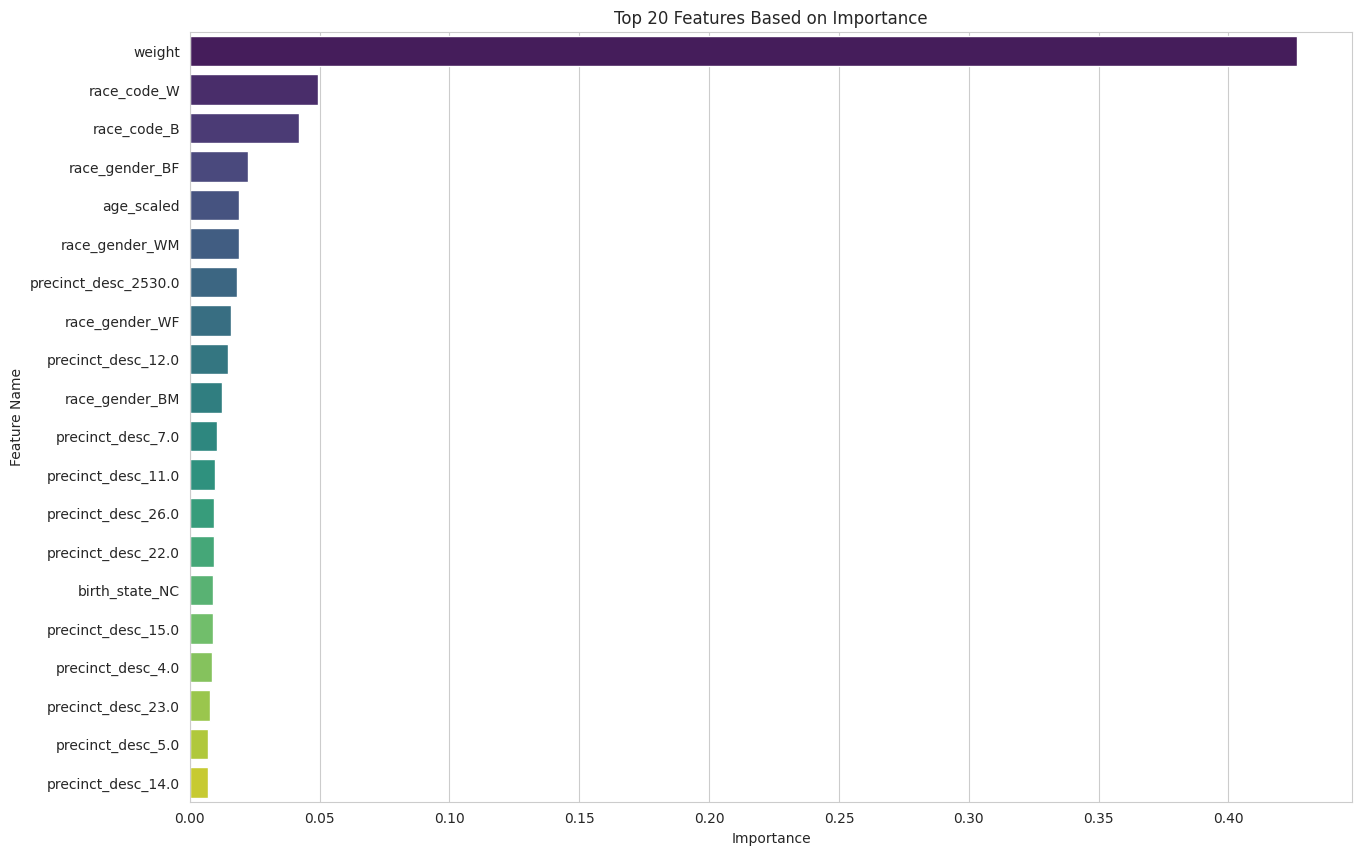

In [ ]:
# Extract feature importance from the RandomForest model
feature_importance = rf_default.feature_importances_

# Getting the feature names from the column transformer
# Since we applied OneHotEncoding to some columns, the number of features will increase.
# So, we need to extract the correct names.
feature_names = (preprocessor.named_transformers_['cat'].get_feature_names_out(columns_to_encode)).tolist() + pass_through_features

# Convert feature importance and feature names into a DataFrame for easier manipulation
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 most important features
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Features Based on Importance')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

**District-Level Party Preference:** "Weight" effectively captures the overall party sentiment of a district. If a majority of voters in a specific Election District have a preference for a particular party, it's a strong indication that an individual from that district may also lean towards that party. This collective sentiment can be very informative for predictions.

**Macro-level Insights:** Rather than relying on individual characteristics, "weight" provides a macro-level insight into the political landscape of an area. It summarizes the overall inclination of a district towards a particular party.

**Strong Predictor:** In many political contexts, geographic regions (like districts) tend to have consistent party preferences due to shared socio-economic conditions, cultural values, historical affiliations, etc. Hence, knowing the dominant party preference of an entire district can be a strong predictor of an individual's political affiliation.

**Data Richness:** If other features in your dataset are more granular or individualistic (e.g., age, education, income), they may not have as direct a connection to party preference as "weight". When training, the model would have picked up on the robustness of the "weight" feature and its direct tie to party preference, giving it more importance.

# Neural Networks (using TensorFlow/Keras):

When working with categorical data for a classification problem, machine learning models generally require the labels to be in a numerical form. Neural networks, like many other machine learning algorithms, cannot work directly with categorical data encoded as strings.

* **Required for Loss Calculation**: Many loss functions, such as the commonly used sparse_categorical_crossentropy, expect the labels to be provided as integers. This loss function compares the predicted output (probabilities for each class) with the actual label in integer form.

* **Facilitates Probability Distribution**: When the labels are encoded as integers, the neural network's output layer can be designed with one neuron per class using a softmax activation function. This setup allows the network to output a probability distribution over the classes.

* **Inverse Transformation**: After predictions, LabelEncoder provides a way to transform the predicted numerical labels back into the original categorical labels for interpretation and reporting purposes.

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable for the training and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Build a simple neural network model
nn_model1 = Sequential([
    Dense(units=64, activation='relu', input_dim=X_train_encoded.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=len(voter_data['party_cd'].unique()), activation='softmax')  # Adjust based on the number of unique classes
])

# Compile the model
nn_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32
hist1 = nn_model1.fit(X_train_encoded, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_encoded, y_test_encoded))


Epoch 1/10
1606/1606 [==============================] - 12s 7ms/step - loss: 0.6926 - accuracy: 0.6950 - val_loss: 0.3784 - val_accuracy: 0.8452
Epoch 2/10
1606/1606 [==============================] - 8s 5ms/step - loss: 0.2437 - accuracy: 0.9087 - val_loss: 0.1696 - val_accuracy: 0.9381
Epoch 3/10
1606/1606 [==============================] - 8s 5ms/step - loss: 0.1282 - accuracy: 0.9549 - val_loss: 0.1114 - val_accuracy: 0.9579
Epoch 4/10
1606/1606 [==============================] - 8s 5ms/step - loss: 0.0961 - accuracy: 0.9634 - val_loss: 0.1060 - val_accuracy: 0.9552
Epoch 5/10
1606/1606 [==============================] - 8s 5ms/step - loss: 0.0819 - accuracy: 0.9678 - val_loss: 0.0829 - val_accuracy: 0.9676
Epoch 6/10
1606/1606 [==============================] - 7s 5ms/step - loss: 0.0720 - accuracy: 0.9716 - val_loss: 0.0841 - val_accuracy: 0.9671
Epoch 7/10
1606/1606 [==============================] - 7s 5ms/step - loss: 0.0645 - accuracy: 0.9739 - val_loss: 0.0733 - val_accuracy

# Saving the Models Predictions for Analysis



In [ ]:
# Generate predictions for the test set
predictions = nn_model1.predict(X_test_encoded)

# Since you used softmax activation, predictions will be in the form of probabilities for each class
predicted_classes = np.argmax(predictions, axis=1)

# Optionally, convert these predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predicted_classes)



689/689 [==============================] - 1s 2ms/step


In [ ]:
# Assuming you have your initial results DataFrame
results_df = pd.DataFrame({
    'actual_label': y_test,
    'predicted_label': predicted_labels,
    'prediction_score': np.max(predictions, axis=1)
})
results_df['timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
results_df['model_version'] = '1.0'  # Example version

# Add/modify other fields as per the JSON structure
results_df['prediction_id'] = range(1, len(results_df) + 1)  # Example ID
results_df['actual_score'] = ''  # Assuming not applicable
results_df['batch_id'] = 'batch_1'  # Example batch ID
results_df['exclude'] = [[] for _ in range(len(results_df))]  # Empty lists for each row
results_df['features_list'] = [list(X_test.columns)] * len(results_df)  # List of feature names
results_df['tags_list'] = [[] for _ in range(len(results_df))]  # Empty lists for each row
results_df['shap_values'] = ''  # Assuming not calculated
results_df['embedding_features'] = [{}] * len(results_df)  # Empty dictionaries for each row

# Saving to CSV (assuming you need a CSV format for upload)
results_df.to_csv('Neural_Net_1.csv', index=False)


# SHAP: an Ethical Obligation

It is an ethical requirement to make consistent efforts towards unveiling feature importance, especially in high stakes domains such as politics, to ensure the mechanisms that contribute to any model's decision making process have the ability to be evaluated. The evaluation of it's logics moral veritability should at the least be quantifiable, and  its alignment (wishfully) should pass pre-established ethical benchmarks pre-deployment. What pre-determinations should contribute to these benchmarks should be imposed as public legislation.

Tools like SHAP (although their are many others) provide insights into feature importance in a model's decision-making process. However, understanding which features a model deems important is different from evaluating whether the model's decisions are ethically sound. **Quantitative measures can reveal 'what' the model is doing but not 'whether it should be doing it'**

In [ ]:
import shap
from scipy import sparse


# Assuming nn_model1 is your trained Keras model and X_train_encoded is your training data

X_train_dense = X_train_encoded.toarray() if isinstance(X_train_encoded, sparse.spmatrix) else X_train_encoded


# Use KernelExplainer as an alternative
explainer = shap.KernelExplainer(nn_model1.predict, shap.sample(X_train_dense, 100))  # Using a sample of 100 for background
shap_values = explainer.shap_values(shap.sample(X_test_encoded, 100))  # Evaluate on a sample if the dataset is large


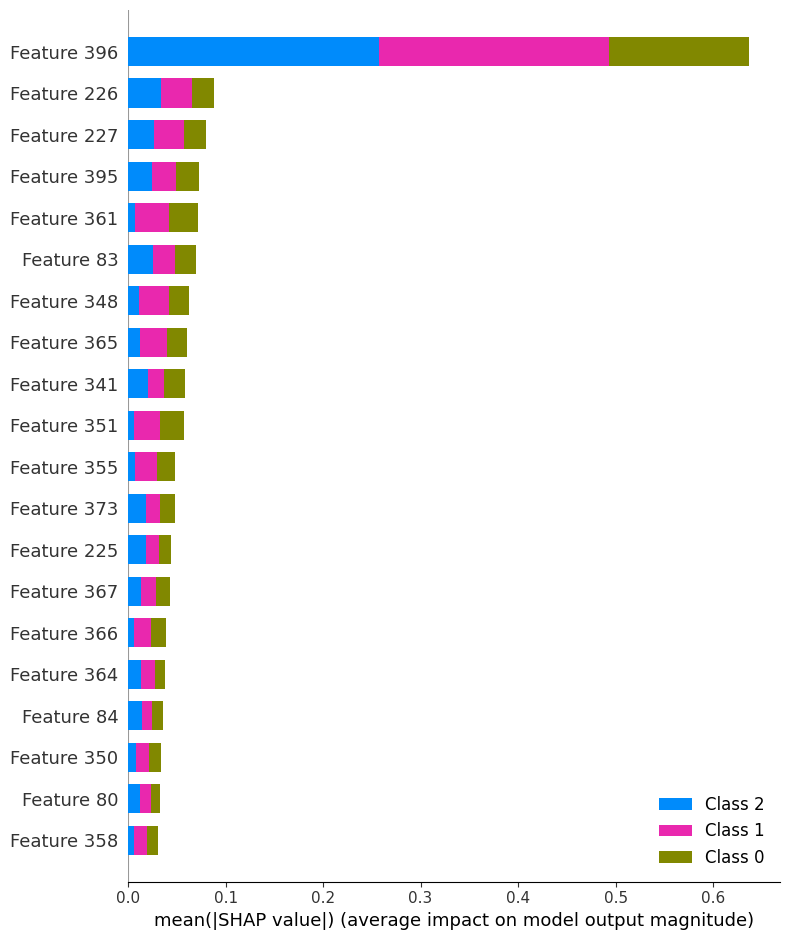

In [ ]:
# Summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_test_encoded)




In [ ]:
test_loss, test_accuracy = nn_model1.evaluate(X_test_encoded, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

689/689 [==============================] - 2s 3ms/step - loss: 0.0662 - accuracy: 0.9732
Test Loss: 0.066243015229702, Test Accuracy: 0.973207414150238


In [ ]:
# Predict the labels on the test set
y_pred_test_nn1 = nn_model1.predict(X_test_encoded)

# Convert predictions from one-hot encoded vectors to class labels
y_pred_test_labels_nn1 = y_pred_test_nn1.argmax(axis=1)

# Generate the classification report
report_nn1 = classification_report(y_test_encoded, y_pred_test_labels_nn1)

# Print the classification report
print(report_nn1)

689/689 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8001
           1       0.98      0.99      0.98      7646
           2       0.97      0.97      0.97      6374

    accuracy                           0.97     22021
   macro avg       0.97      0.97      0.97     22021
weighted avg       0.97      0.97      0.97     22021



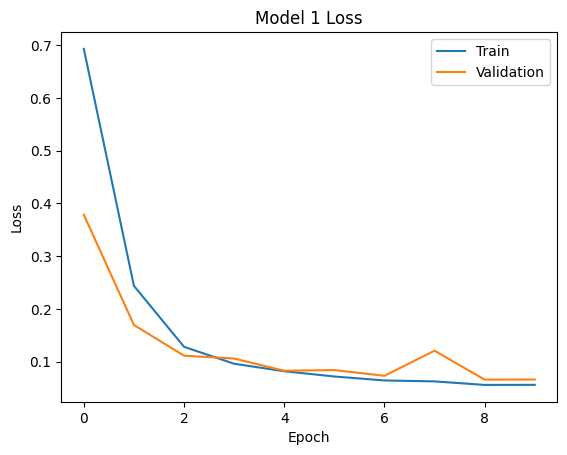

In [ ]:
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

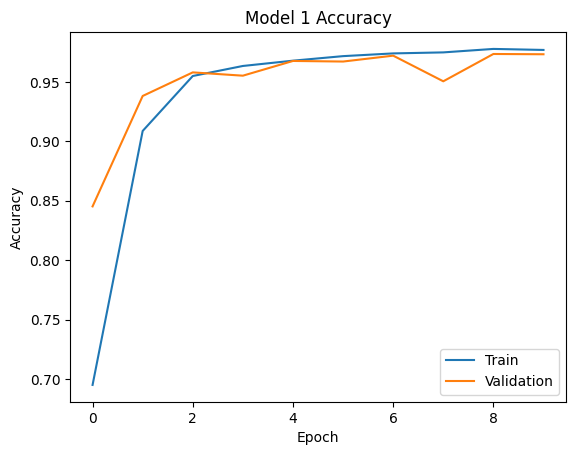

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Create a sequential model with regularization
nn_model2 = Sequential()
nn_model2.add(Dense(128, activation='relu', input_dim=X_train_encoded.shape[1], kernel_regularizer=l2(0.01)))
nn_model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
nn_model2.add(Dense(len(voter_data['party_cd'].unique()), activation='softmax'))

# Compile the model
nn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with additional epochs
hist2 = nn_model2.fit(X_train_encoded, y_train_encoded, epochs=15, batch_size=32, validation_data=(X_test_encoded, y_test_encoded))

Epoch 1/15
1606/1606 [==============================] - 9s 5ms/step - loss: 0.9431 - accuracy: 0.6480 - val_loss: 0.7985 - val_accuracy: 0.6790
Epoch 2/15
1606/1606 [==============================] - 7s 4ms/step - loss: 0.7258 - accuracy: 0.7579 - val_loss: 0.6767 - val_accuracy: 0.7937
Epoch 3/15
1606/1606 [==============================] - 8s 5ms/step - loss: 0.6159 - accuracy: 0.8214 - val_loss: 0.5819 - val_accuracy: 0.8371
Epoch 4/15
1606/1606 [==============================] - 7s 4ms/step - loss: 0.5203 - accuracy: 0.8709 - val_loss: 0.4781 - val_accuracy: 0.8963
Epoch 5/15
1606/1606 [==============================] - 7s 4ms/step - loss: 0.4567 - accuracy: 0.8995 - val_loss: 0.4411 - val_accuracy: 0.8999
Epoch 6/15
1606/1606 [==============================] - 7s 4ms/step - loss: 0.4178 - accuracy: 0.9144 - val_loss: 0.4070 - val_accuracy: 0.9151
Epoch 7/15
1606/1606 [==============================] - 7s 4ms/step - loss: 0.3893 - accuracy: 0.9213 - val_loss: 0.3836 - val_accuracy:

In [ ]:
test_loss, test_accuracy = nn_model2.evaluate(X_test_encoded, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

689/689 [==============================] - 2s 3ms/step - loss: 0.2966 - accuracy: 0.9440
Test Loss: 0.2965666949748993, Test Accuracy: 0.943962574005127


In [ ]:
# Predict the labels on the test set
y_pred_test_nn2 = nn_model2.predict(X_test_encoded)

# Convert predictions from one-hot encoded vectors to class labels
y_pred_test_labels_nn2 = y_pred_test_nn2.argmax(axis=1)

# Generate the classification report
report_nn2 = classification_report(y_test_encoded, y_pred_test_labels_nn2)

# Print the classification report
print(report_nn2)

689/689 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8001
           1       0.96      0.98      0.97      7646
           2       0.92      0.94      0.93      6374

    accuracy                           0.94     22021
   macro avg       0.94      0.94      0.94     22021
weighted avg       0.94      0.94      0.94     22021



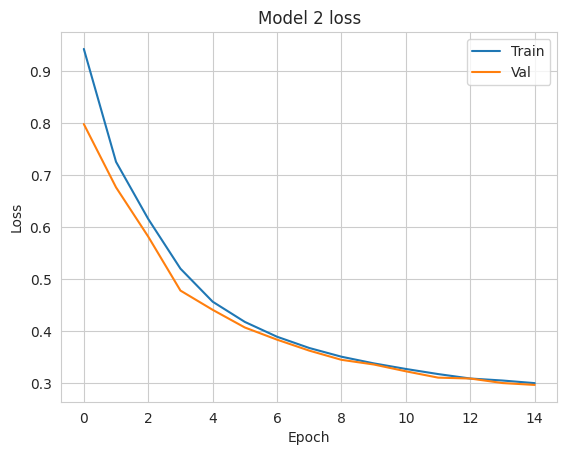

In [ ]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


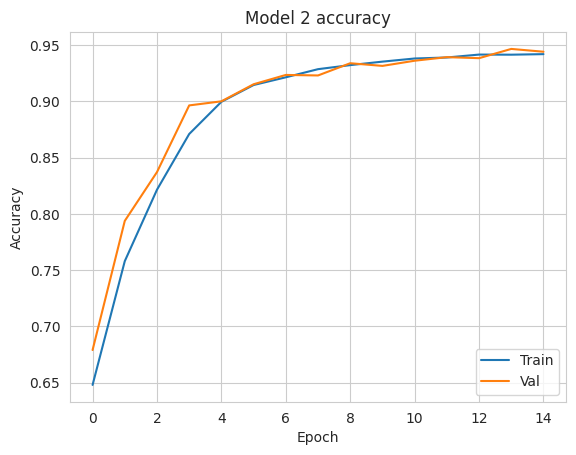

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Boosting Classifier



In [ ]:
# Initialize the XGBoost classifier with default parameters
xgb_clf = XGBClassifier⁷()

# Fit the classifier to the training data
xgb_clf.fit(X_train_encoded, y_train_encoded)

# Predict the labels for the test set
y_pred = xgb_clf.predict(X_test_encoded)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [ ]:
# Predict the labels on the test set
y_pred_xgb = xgb_clf.predict(X_test_encoded)

# Generate the classification report
report_xgb = classification_report(y_test_encoded, y_pred_xgb)

# Print the classification report
print(report_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8001
           1       1.00      1.00      1.00      7646
           2       1.00      1.00      1.00      6374

    accuracy                           1.00     22021
   macro avg       1.00      1.00      1.00     22021
weighted avg       1.00      1.00      1.00     22021



In [ ]:
train_sizes = [int((X_train_encoded.shape[0]) * x) for x in [0.1, 0.3, 0.5, 0.7, 0.9]]
estimators = [50]
learning_rates = [ 0.01, 0.1, 1]

results = {}

for n in estimators:
    for lr in learning_rates:
        train_scores = []
        test_scores = []
        for train_size in train_sizes:
            # Create a smaller training set
            X_train_small = X_train_encoded[:train_size]
            y_train_small = y_train_encoded[:train_size]

            # Train the model on the smaller dataset
            xgb_clf = XGBClassifier(n_estimators=n,
                                    use_label_encoder=False,
                                    eval_metric='mlogloss',
                                    gamma=1,
                                    learning_rate=lr,
                                    max_depth=4,
                                    num_class=3)
            xgb_clf.fit(X_train_small, y_train_small)

            # Evaluate on the smaller training set and the full test set
            train_pred = xgb_clf.predict(X_train_small)
            test_pred = xgb_clf.predict(X_test_encoded)

            train_accuracy = accuracy_score(y_train_small, train_pred)
            test_accuracy = accuracy_score(y_test_encoded, test_pred)

            train_scores.append(train_accuracy)
            test_scores.append(test_accuracy)

        # Store the results
        results[(n, lr)] = (train_scores, test_scores)


In [ ]:
# Plotting the learning curves
for (n, lr), (train_scores, test_scores) in results.items():
    plt.plot(train_sizes, train_scores, label=f'Train - n_estimators: {n}, lr: {lr}')
    plt.plot(train_sizes, test_scores, label=f'Test - n_estimators: {n}, lr: {lr}')
    plt.title('Learning Curves for XGBClassifier')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()


plt.show()


* High Training Accuracy: Across all learning rates, the training accuracy is high, close to 1 (or 100%). This suggests that the model is able to fit the training data very well.

* Test Accuracy Varies with Learning Rate: The test accuracy varies depending on the learning rate. A lower learning rate (0.01) seems to provide a more stable and consistent accuracy across different training sizes compared to higher learning rates.

* Overfitting at High Learning Rate: For the highest learning rate (lr: 1), the model's test accuracy is significantly lower than the training accuracy, which could be an indication of overfitting. This means that while the model learns the training data very well, it does not generalize as effectively to unseen data.

* Gap Between Training and Test Accuracy: The gap between training and test accuracy for learning rates 0.01 and 0.1 suggests that the model might be overfitting, especially at the beginning of the training size spectrum. As more data is used for training, the test accuracy improves, reducing the gap, which indicates better generalization.

* Learning Rate 0.1 Shows Good Generalization: With a learning rate of 0.1, the model seems to generalize better as the gap between training and test accuracy is smaller. This learning rate might be a good starting point for further tuning.

* Potential for Further Improvement: The fact that test accuracy continues to rise with more training data suggests that the model may benefit from more data, or that further hyperparameter tuning is needed to optimize performance for smaller datasets.

In [ ]:
# Initialize the XGBoost classifier with specified learning rate and number of estimators
xgb_clf2= XGBClassifier(learning_rate=0.01, n_estimators=50)

# Fit the classifier to the training data
xgb_clf2.fit(X_train_encoded, y_train_encoded)

# You can now proceed to use this model to predict and evaluate as needed
# For example, predicting the labels for the test set
y_pred= xgb_clf2.predict(X_test_encoded)

# Calculate the accuracy of the model, or generate a classification report
accuracy_custom = accuracy_score(y_test_encoded, y_pred)
print(f"Custom XGBoost Model Accuracy: {accuracy_custom:.4f}")

Custom XGBoost Model Accuracy: 0.9711


In [ ]:
# Predict the labels on the test set using the custom XGBoost model
y_pred_custom = xgb_clf2.predict(X_test_encoded)

# Generate the classification report
report_custom = classification_report(y_test_encoded, y_pred_custom)

# Print the classification report
print("Custom XGBoost Model Classification Report:\n", report_custom)

Custom XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      8001
           1       0.99      0.99      0.99      7646
           2       0.93      1.00      0.96      6374

    accuracy                           0.97     22021
   macro avg       0.97      0.97      0.97     22021
weighted avg       0.97      0.97      0.97     22021



Part II:

## **Data Preparation:**

In [ ]:
# Data Preparation
X = voter_data.drop('party_cd', axis=1)
y = voter_data['party_cd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Feature Selection and Transformation:**


In [ ]:
pass_through_features = ['age_scaled', 'weight']
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = [feat for feat in numeric_features if feat not in pass_through_features]


# **Fit and Transform the Data**

In [ ]:

# Transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## **Dimensionality Reduction:**


# **Advantages of UMAP:**

1. **Faster runtime:** UMAP uses efficient algorithms and data structures, leading to faster training and embedding times compared to t-SNE. This makes it more suitable for large datasets where t-SNE might become computationally expensive.

2. **Memory efficiency:** UMAP requires less memory than t-SNE, especially for high-dimensional data. This allows it to handle larger datasets on machines with limited memory resources.
Better for manifold learning: UMAP is specifically designed for learning low-dimensional representations of data that lies on non-linear manifolds. This makes it more effective in preserving the underlying structure and relationships in the data compared to t-SNE, which can be less effective for complex manifolds.

3. **Scalability with dimensionality:** Unlike t-SNE, whose performance can deteriorate significantly with increasing dimensionality, UMAP scales well with the number of features. This makes it suitable for analyzing high-dimensional datasets without sacrificing accuracy or performance.

# **Why Umap Stinks in this Domain**

1. Although Umap is scalable for larger datasets it's non linearity is less explainable.

2. Campaign strategist often want a models descion process to be clearly explainable in this case our trade off for clustering were the features.

3. Without features we are left to guess which things are important for classifying voter affiliation. One thing that we can interpret is that political sentiments gather in homophilic groups.

In [ ]:
!pip install umap-Learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for umap-Learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=a06b049021480531de917421f24001404ef0786854d95ef310137cb0c67edf66
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-Learn


In [ ]:
import umap

# Define the range of components to explore
n_components_range = range(2, 10)  # Adjust the range as needed

# Initialize an empty dictionary to store explained variances
explained_variances = {}

for n in n_components_range:
    # Create and fit the UMAP model
    umap_model = umap.UMAP(n_components=n, random_state=42)
    umap_features = umap_model.fit_transform(X_train_scaled)

    # Calculate the explained variance ratio
    explained_variance = np.sum(umap_model.embedding_.std(axis=0))

    # Store the variance for the current number of components
    explained_variances[n] = explained_variance



NameError: ignored

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the points with markers
for n, explained_variance in explained_variances.items():
    plt.plot([n], [explained_variance], marker='o', label=f"{n} components")

# Connect the points with a line
plt.plot(list(explained_variances.keys()), list(explained_variances.values()), marker='o', linestyle='-', color='blue')

plt.xlabel('Number of Components (UMAP)')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components (UMAP)')
plt.grid(True)
plt.show()

NameError: ignored

<Figure size 1200x600 with 0 Axes>

## **Observations:**

Unlike with PCA UMAP does not inherently provide an 'explained variance' metric like PCA does. The concept of 'explained variance' in PCA is tied to the eigenvalues of the covariance matrix of the data. UMAP, on the other hand, is a manifold learning technique and operates differently. The embedding_.std(axis=0) you are using gives the standard deviation of the embedded points along each dimension, which might not directly correspond.


In [ ]:
from sklearn.metrics import silhouette_score

n_components_optimal = 3
# Define a function to calculate silhouette score
def calculate_silhouette_score(X_embedded):
    # Train UMAP with 3 components
    umap_final_model = umap.UMAP(n_components=n_components_optimal, random_state=42)
    umap_features = umap_final_model.fit_transform(X_train_scaled)
    return silhouette_score(umap_features)

# Calculate silhouette score with labels
silhouette_score = silhouette_score(umap_features, y_train)
print("Silhouette Score:", silhouette_score)

NameError: ignored

In [ ]:
import plotly.express as px

# Create the Plotly figure
fig = px.scatter_3d(
    x=umap_features[:, 0],
    y=umap_features[:, 1],
    z=umap_features[:, 2],
    color=y_train_encoded,
    title="UMAP Embedding with Party Affiliation",
)

# Add interactive features through the Plotly layout
fig.update_layout(scene=dict(xaxis_title="UMAP Dimension 1",
                             yaxis_title="UMAP Dimension 2",
                             zaxis_title="UMAP Dimension 3"),
                   margin=dict(t=50),
                   hovermode="closest")

# Show the interactive plot
fig.show()

# K-Means Clustering on Reduced U-map features

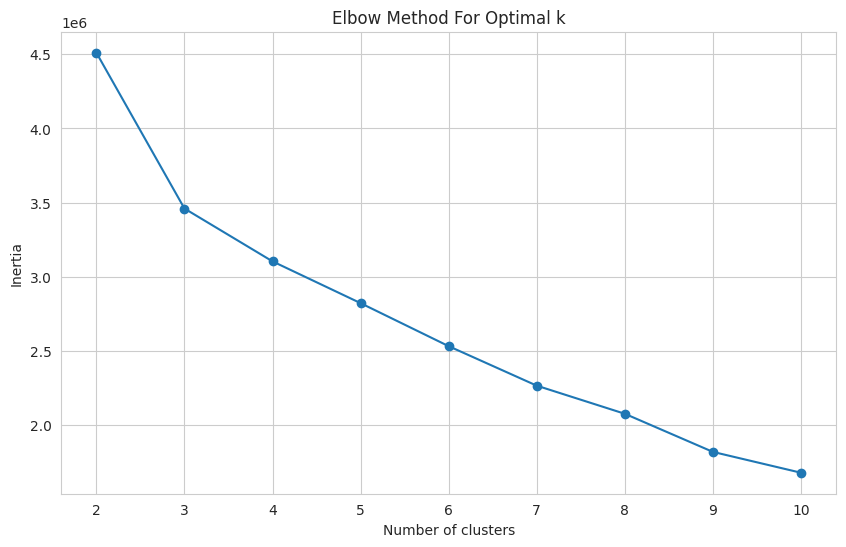

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 11)  # Adjust the range as needed
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
    kmeans.fit(umap_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters (manually after observing the Elbow plot)
optimal_k = 4  # Replace with your chosen number

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=k, n_init= 10, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_features)


In [ ]:
import plotly.graph_objs as go

cluster_trace = go.Scatter3d(
    x=umap_features[:, 0],
    y=umap_features[:, 1],
    z=umap_features[:, 2],
    mode='markers',
    marker=dict(size=5, color=kmeans_labels, colorscale='Viridis', opacity=0.5),
    name='Clusters'
)

# Create a trace for the centroids
centroid_trace = go.Scatter3d(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    z=kmeans.cluster_centers_[:, 2],
    mode='markers',
    marker=dict(size=10, color='red', opacity=0.8),
    name='Centroids'
)


layout = go.Layout(
    title='3D Visualization of K-Means Clusters with Centroids',
    scene=dict(
        xaxis=dict(title='UMAP Dimension 1'),
        yaxis=dict(title='UMAP Dimension 2'),
        zaxis=dict(title='UMAP Dimension 3')
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Combine the traces and plot
fig = go.Figure(data=[cluster_trace, centroid_trace], layout=layout)
fig.show()


In [ ]:
# Assuming you've determined that 3 components are optimal
umap_final_model = umap.UMAP(n_components=3, random_state=42)
umap_embeddings = umap_final_model.fit_transform(X_train_scaled)

# Add UMAP embeddings to your complete_data DataFrame
complete_data['umap_embedding_x'] = umap_embeddings[:, 0]
complete_data['umap_embedding_y'] = umap_embeddings[:, 1]
complete_data['umap_embedding_z'] = umap_embeddings[:, 2]


#Independent Component Analysis

Independent Component Analysis (ICA) could be useful in the context of voter behavior analysis in several ways:

1. Feature Extraction: Voter behavior contain many mixed demographic frequencies, ICA can prove instrumental in separating these into independent components, which might represent underlying factors that influence turnout and behavior.

2. Noise Reduction: ICA can also be used to remove noise from our data, enhancing the quality of the signal analysis. For instance, if there are errors or inconsistencies in the data, ICA can help isolate these outliers as separate components.

3. By transforming the data into independent frequencies ICA can reveal non-obvious tonalities in behavior that are not captured by other dimensionality reduction techniques like PCA, which only removes correlation rather than ensuring independence.

4. Interpretability: For political analysts and campaign strategists, understanding the independent factors that drive voter decisions can help tailor political messages and policies that resonate with different segments of the electorate.

In [ ]:
from sklearn.decomposition import FastICA

# Convert the sparse matrix to a dense matrix
X_train_transformed_dense = X_train_transformed.toarray()
X_test_transformed_dense = X_test_transformed.toarray()

# Apply ICA on the dense matrix
ica = FastICA(n_components=3, random_state=42, whiten='arbitrary-variance')
X_train_ica = ica.fit_transform(X_train_transformed_dense)
X_test_ica = ica.transform(X_test_transformed_dense)


## **RANDOM THOUGHT**

Most of the polling places in Wayne County have hisotrically been churches. Which could heavily influence both voter AND campaign behavior.

Additional Feature Engineering:



In [ ]:

polling_place_mapping = {
    1.0: 'Fremont United Methodist',
    2.0: 'Eureka United Methodist Church',
    3.0: 'Little River Fire Station',
    4.0: 'Pikeville Fire Station',
    5.0: 'Belfast Fire Department',
    6.0: 'Saulston United Methodist church',
    7.0: 'New Hope Fire Station',
    8.0: 'Oakland Fire Station',
    9.0: 'Westwood United Methodist Church',
    10.0: 'Eastern Chapel Missionary Baptist',
    11.0: 'Greenleaf Christian Church',
    12.0: 'Adamsville Baptist Church',
    13.0: 'Family of Faith Community Church',
    14.0: 'New Hope Friends Church',
    15.0: 'Seven Springs Baptist Church',
    16.0: 'American Legion Post 11',
    17.0: 'Wayne Center',
    18.0: 'Wages Bldg',
    1920.0: 'First African Baptist Church',
    21.0: 'St. Luke United Methodist Church',
    22.0: 'Faith Alliance Church',
    23.0: 'The Hydrant Wesleyan Church',
    24.0: 'Grantham Firestation',
    2530.0: 'Mt. Olive Civic Center',
    26.0: 'Dudley Fire Station',
    27.0: 'Mays Chapel Church',
    28.0: 'Indian Springs Fire Station',
    29.0: 'Wayne County Public Library',

}



# Convert the precinct_desc to integer for proper mapping
voter_data['precinct_desc'] = voter_data['precinct_desc'].astype(float)

# Map the precinct_desc to the polling place names using the mapping
voter_data['polling_place'] = voter_data['precinct_desc'].map(polling_place_mapping)

# Display the DataFrame to verify the new column
voter_data


race_code party_cd gender_code  birth_year birth_state  age_at_year_end  \
0             W      UNA           F        1984          VA               39   
1             W      REP           M        1956          CA               67   
2             W      UNA           M        1980          CA               43   
3             W      REP           F        1955          OC               68   
4             W      REP           F        1986          NY               37   
...         ...      ...         ...         ...         ...              ...   
73397         W      REP           F        1942          NC               81   
73398         W      REP           F        1976          NC               47   
73399         W      REP           M        1943          NC               80   
73400         A      UNA           F        1949          OC               74   
73401         B      DEM           M        1994          NY               29   

       precinct_desc    weight age_group  generation race_gender  \
0             2530.0  0.250636     30-39  Millennial          WF   
1                7.0  0.395203     60-69      Boomer          WM   
2               12.0  0.297699     40-49       Gen X          WM   
3                7.0  0.395203     60-69      Boomer          WF   
4               21.0  0.168229     30-39  Millennial          WF   
...              ...       ...       ...         ...         ...   
73397            6.0  0.355369     80-89      Silent          WF   
73398            6.0  0.355369     40-49       Gen X          WF   
73399            6.0  0.355369     80-89      Silent          WM   
73400            7.0  0.297691     70-79      Boomer          AF   
73401         1920.0  0.678468     18-29  Millennial          BM   

      generation_race_gender  age_scaled                     polling_place  
0              Millennial_WF      0.2625            Mt. Olive Civic Center  
1                  Boomer_WM      0.6125             New Hope Fire Station  
2                   Gen X_WM      0.3125         Adamsville Baptist Church  
3                  Boomer_WF      0.6250             New Hope Fire Station  
4              Millennial_WF      0.2375  St. Luke United Methodist Church  
...                      ...         ...                               ...  
73397              Silent_WF      0.7875  Saulston United Methodist church  
73398               Gen X_WF      0.3625  Saulston United Methodist church  
73399              Silent_WM      0.7750  Saulston United Methodist church  
73400              Boomer_AF      0.7000             New Hope Fire Station  
73401          Millennial_BM      0.1375      First African Baptist Church  

[73402 rows x 14 columns]

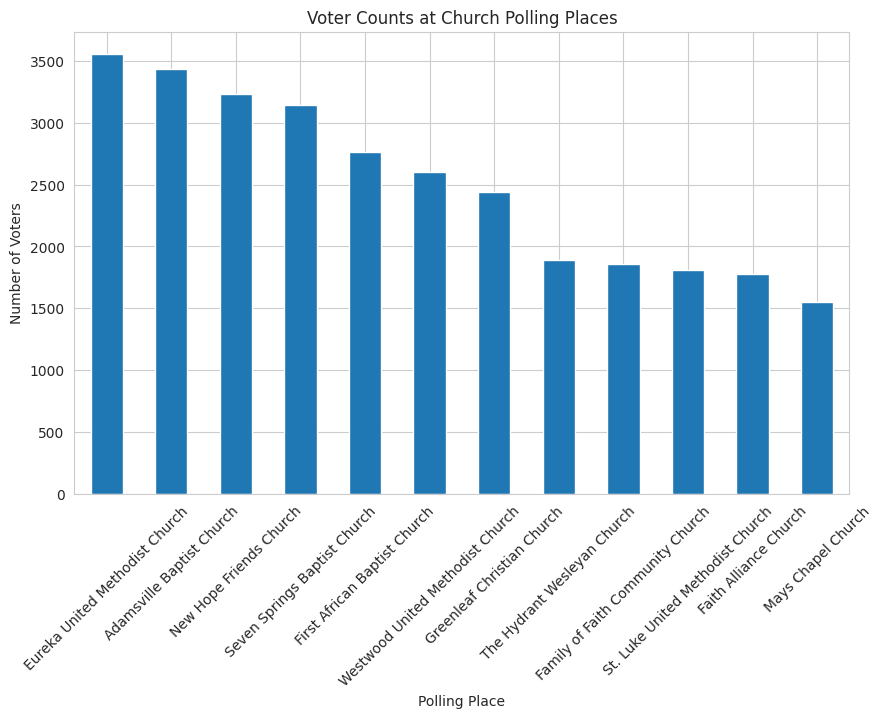

In [ ]:
# Filter data for church polling places
church_polling_places = voter_data[voter_data['polling_place'].str.contains('Church')]

# Aggregation example: Count voters per church
voter_counts = church_polling_places['polling_place'].value_counts()

# Visualize the data
plt.figure(figsize=(10, 6))
voter_counts.plot(kind='bar')
plt.title('Voter Counts at Church Polling Places')
plt.xlabel('Polling Place')
plt.ylabel('Number of Voters')
plt.xticks(rotation=45)
plt.show()

In [ ]:
church_data = voter_data[voter_data['polling_place'].str.contains("Church|chapel|Methodist|Baptist", case=False, na=False)]


# Add 'district' to the groupby
grouped = church_data.groupby(['polling_place', 'precinct_desc', 'party_cd']).size().reset_index(name='counts')

# Pivot the table to have polling places and districts as rows, and parties as columns
party_pivot = grouped.pivot(index=['polling_place', 'precinct_desc'], columns='party_cd', values='counts').fillna(0)

party_pivot


party_cd                                          DEM   REP   UNA
polling_place                     precinct_desc                  
Adamsville Baptist Church         12.0           1535   876  1022
Eastern Chapel Missionary Baptist 10.0           1029   273   445
Eureka United Methodist Church    2.0             878  1661  1022
Faith Alliance Church             22.0            789   458   529
Family of Faith Community Church  13.0            959   381   516
First African Baptist Church      1920.0         1878   194   696
Fremont United Methodist          1.0             655   942   628
Greenleaf Christian Church        11.0           1219   581   640
Mays Chapel Church                27.0            929   235   389
New Hope Friends Church           14.0            795  1521   921
Saulston United Methodist church  6.0             955   930   732
Seven Springs Baptist Church      15.0            903  1232  1009
St. Luke United Methodist Church  21.0           1020   305   488
The Hydrant Wesleyan Church       23.0            659   592   638
Westwood United Methodist Church  9.0             660  1194   752

## **Train a KNN model**

In [ ]:
# starting from scratch with our cleaned voter data
voter_data

race_code party_cd gender_code  birth_year birth_state  age_at_year_end  \
0             W      UNA           F        1984          VA               39   
1             W      REP           M        1956          CA               67   
2             W      UNA           M        1980          CA               43   
3             W      REP           F        1955          OC               68   
4             W      REP           F        1986          NY               37   
...         ...      ...         ...         ...         ...              ...   
73397         W      REP           F        1942          NC               81   
73398         W      REP           F        1976          NC               47   
73399         W      REP           M        1943          NC               80   
73400         A      UNA           F        1949          OC               74   
73401         B      DEM           M        1994          NY               29   

       precinct_desc    weight age_group  generation race_gender  \
0             2530.0  0.250636     30-39  Millennial          WF   
1                7.0  0.395203     60-69      Boomer          WM   
2               12.0  0.297699     40-49       Gen X          WM   
3                7.0  0.395203     60-69      Boomer          WF   
4               21.0  0.168229     30-39  Millennial          WF   
...              ...       ...       ...         ...         ...   
73397            6.0  0.355369     80-89      Silent          WF   
73398            6.0  0.355369     40-49       Gen X          WF   
73399            6.0  0.355369     80-89      Silent          WM   
73400            7.0  0.297691     70-79      Boomer          AF   
73401         1920.0  0.678468     18-29  Millennial          BM   

      generation_race_gender  age_scaled                     polling_place  
0              Millennial_WF      0.2625            Mt. Olive Civic Center  
1                  Boomer_WM      0.6125             New Hope Fire Station  
2                   Gen X_WM      0.3125         Adamsville Baptist Church  
3                  Boomer_WF      0.6250             New Hope Fire Station  
4              Millennial_WF      0.2375  St. Luke United Methodist Church  
...                      ...         ...                               ...  
73397              Silent_WF      0.7875  Saulston United Methodist church  
73398               Gen X_WF      0.3625  Saulston United Methodist church  
73399              Silent_WM      0.7750  Saulston United Methodist church  
73400              Boomer_AF      0.7000             New Hope Fire Station  
73401          Millennial_BM      0.1375      First African Baptist Church  

[73402 rows x 14 columns]

In [ ]:
# Separate features and target variable
X = voter_data.drop('party_cd', axis=1)
y = voter_data['party_cd']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Columns that are already in the desired format and don't need any transformation
pass_through_features = ['age_scaled', 'weight']

# Define the list of numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Exclude pass_through_features from numeric_features
numeric_features = [feat for feat in numeric_features if feat not in pass_through_features]

# Create transformers for numeric and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('pass', 'passthrough', pass_through_features)
    ])


In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', knn_classifier)
])

# Train the KNN classifier within the pipeline on your training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

         DEM       0.81      0.84      0.83      8001
         REP       0.83      0.86      0.84      7646
         UNA       0.75      0.67      0.71      6374

    accuracy                           0.80     22021
   macro avg       0.80      0.79      0.79     22021
weighted avg       0.80      0.80      0.80     22021



In [ ]:
n_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_ica)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



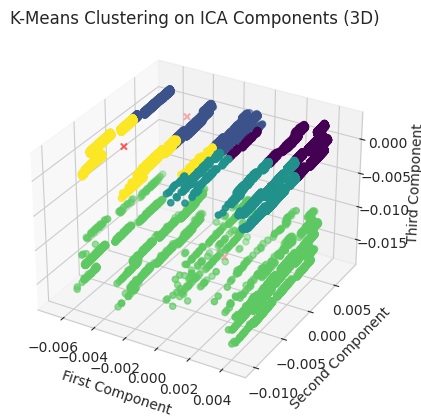

In [ ]:


    centroids = kmeans.cluster_centers_

    from mpl_toolkits.mplot3d import Axes3D


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train_ica[:, 0], X_train_ica[:, 1], X_train_ica[:, 2], c=kmeans_labels, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x')  # Plot centroids
    ax.set_xlabel('First Component')
    ax.set_ylabel('Second Component')
    ax.set_zlabel('Third Component')
    plt.title('K-Means Clustering on ICA Components (3D)')
    plt.show()

In [ ]:
# Initialize a label encoder
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest_classifier.fit(X_train_umap, y_train_encoded)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_test_umap)

# You can decode the predicted labels back to their original string labels if needed
y_pred_original_labels = label_encoder.inverse_transform(y_pred)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_encoded, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.2f}")

# Create the confusion matrix
confusion = confusion_matrix(y_test_encoded, y_pred_encoded)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.56
Confusion Matrix:
[[5520 1768  713]
 [ 398 6360  888]
 [1590 3367 1417]]
